# Plotting and Visualization

In [2]:
%matplotlib notebook

## A Brief matplotlib API primer

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
data = np.arange(10)

In [6]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


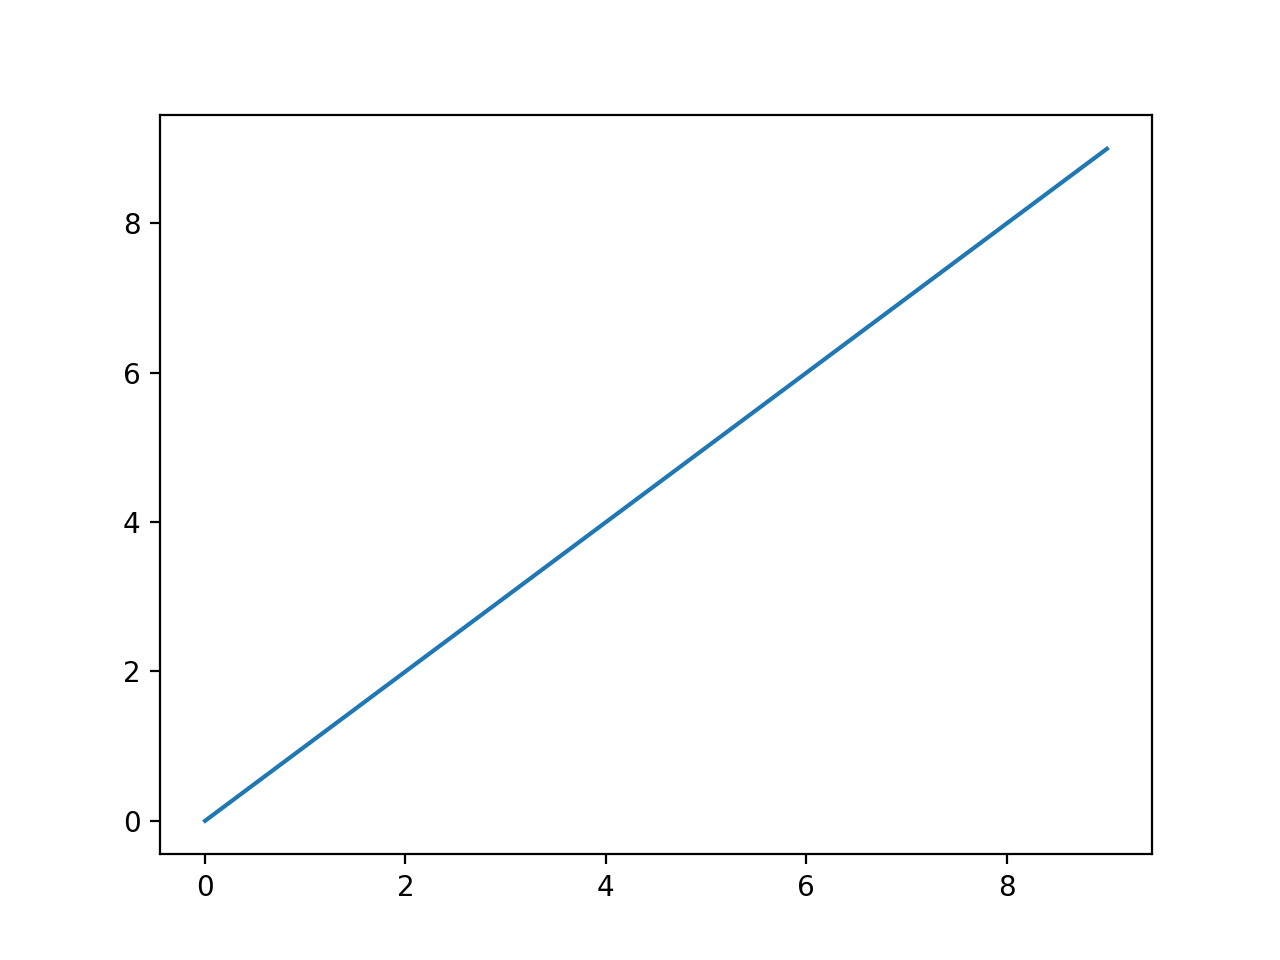

In [7]:
plt.plot(data)

While libraries like seaborn and pandas's built-in plotting functions will deal with many of the mundane details of making plots, should we wish to customize the beyond the function opitions provided, you will need to learn a bit about matplotlib API.

### Figures and Subplots

Plots in matplotlib reside within a __Figure__ object. You can create a new figure with plt.figure:

<IPython.core.display.Javascript object>


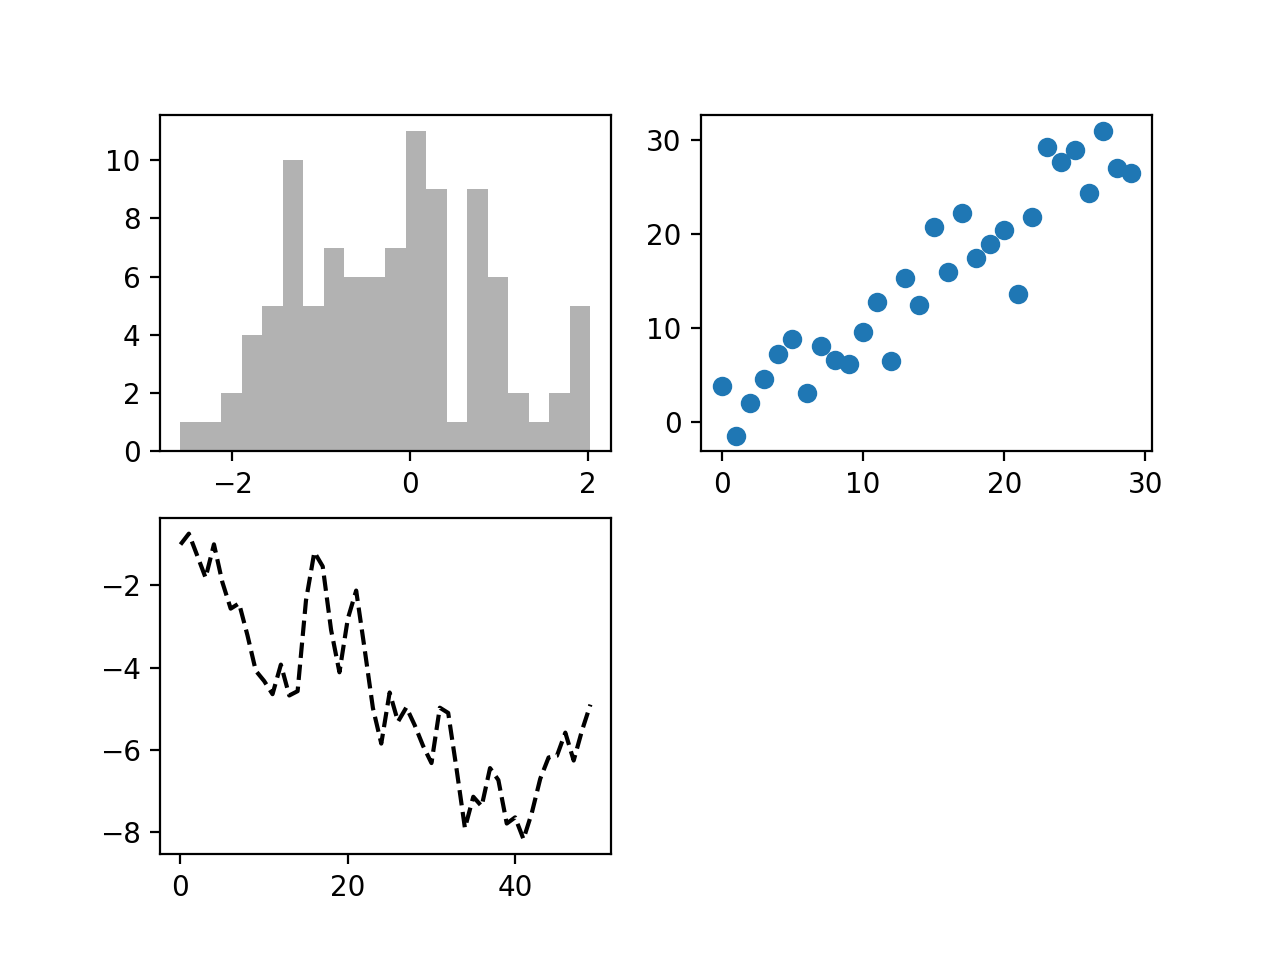

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.randn(100), bins=20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


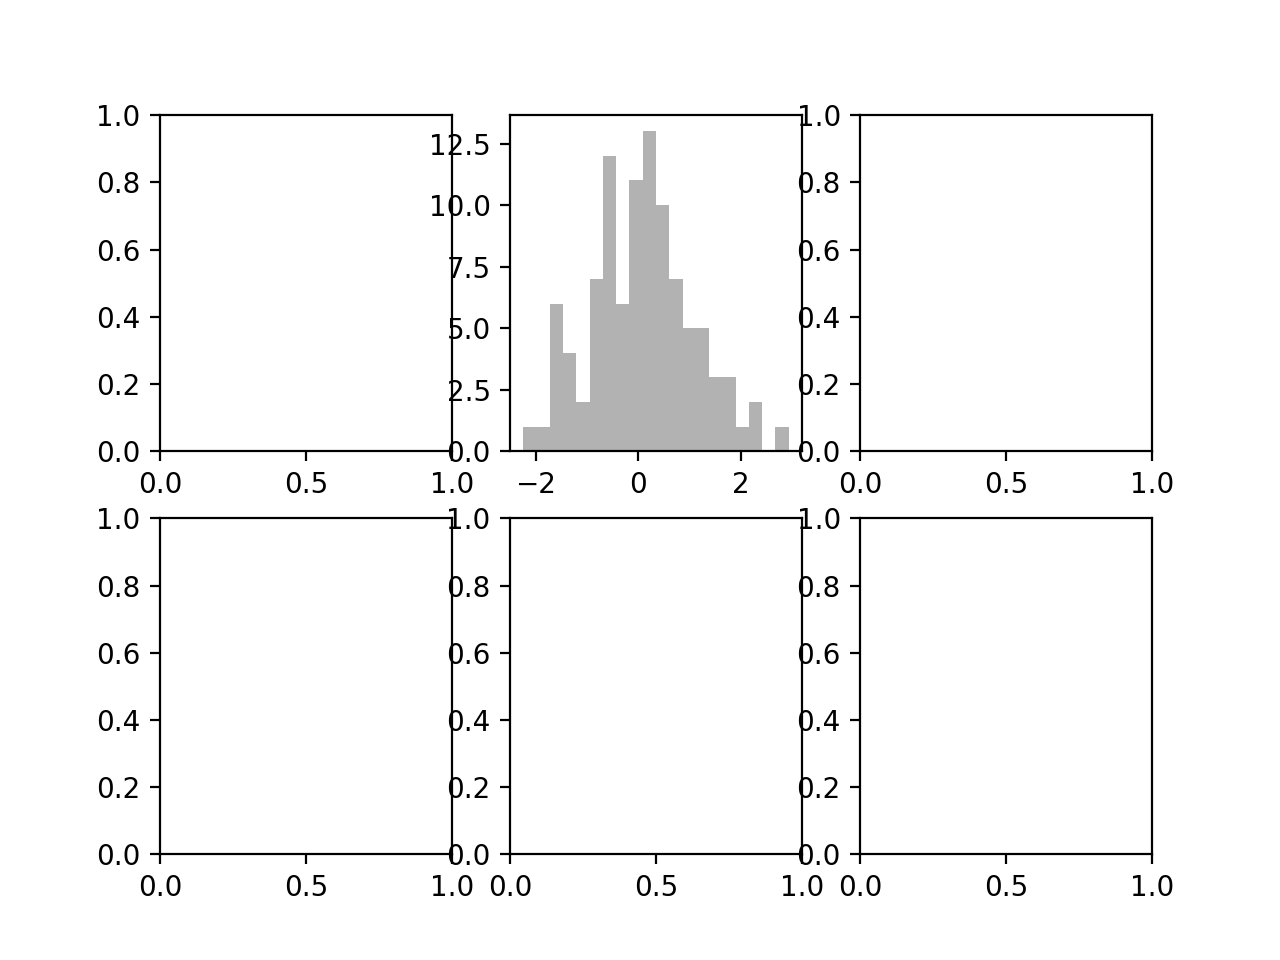

(array([ 1.,  1.,  6.,  4.,  2.,  7., 12.,  6., 11., 13., 10.,  7.,  5.,
         5.,  3.,  3.,  1.,  2.,  0.,  1.]),
 array([-2.24209783, -1.98375152, -1.72540521, -1.4670589 , -1.20871259,
        -0.95036628, -0.69201997, -0.43367366, -0.17532735,  0.08301896,
         0.34136527,  0.59971158,  0.85805789,  1.1164042 ,  1.37475051,
         1.63309682,  1.89144313,  2.14978944,  2.40813575,  2.66648206,
         2.92482837]),
 <a list of 20 Patch objects>)

In [8]:
fig, axes = plt.subplots(2,3)
axes[0,1].hist(np.random.randn(100), bins=20, color = 'k', alpha = 0.3)

In [9]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA82821D68>,
      dtype=object)

Here the axes can be easily indexed like a two-dimensional array; for example, axes[0,1].

#### Adjusting the spacing around subplots

<IPython.core.display.Javascript object>


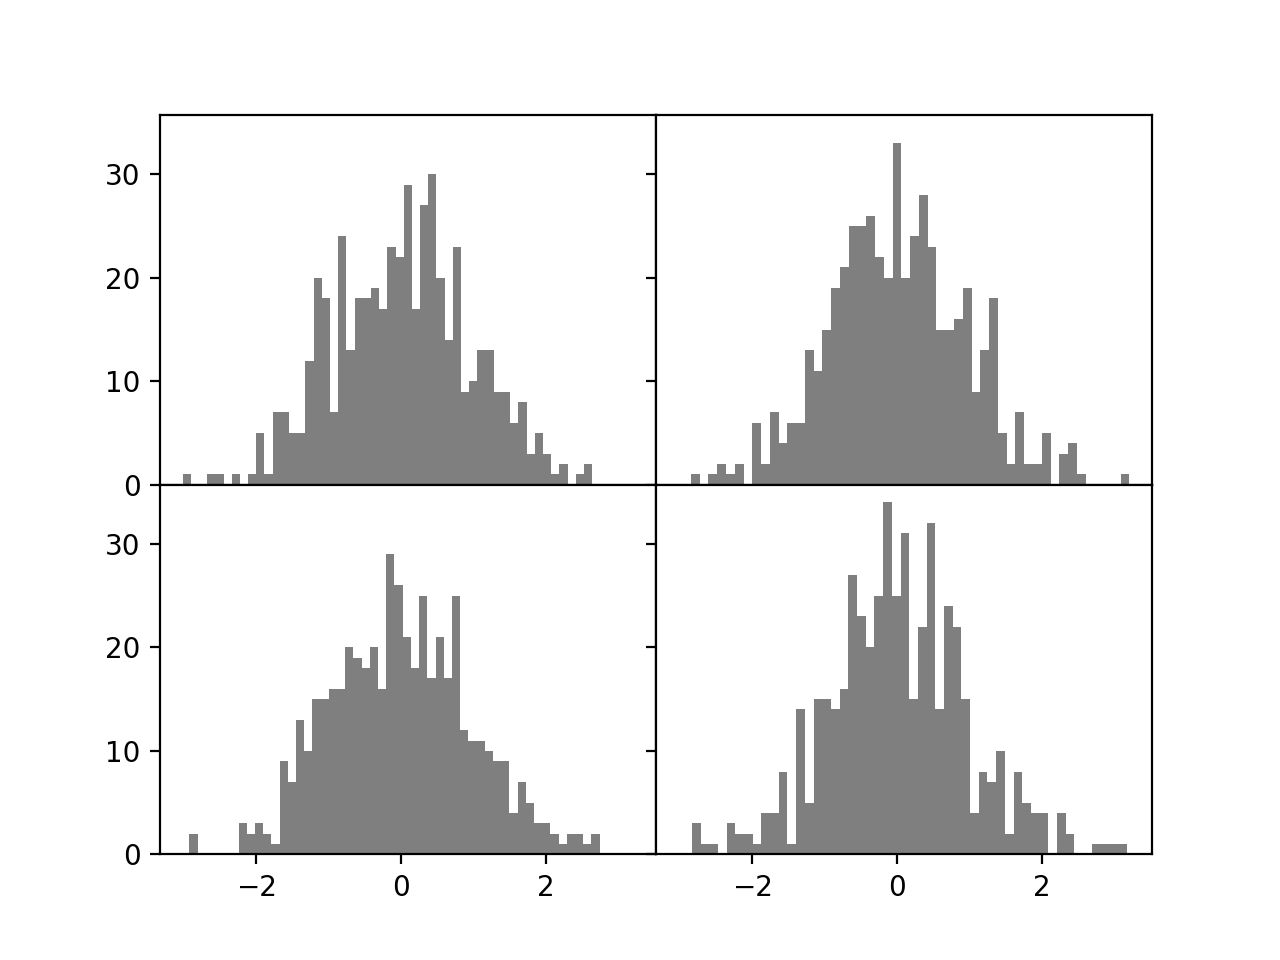

In [10]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50, color='k', alpha = 0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [11]:
# plt.plot? # call the help for the plot function

<IPython.core.display.Javascript object>


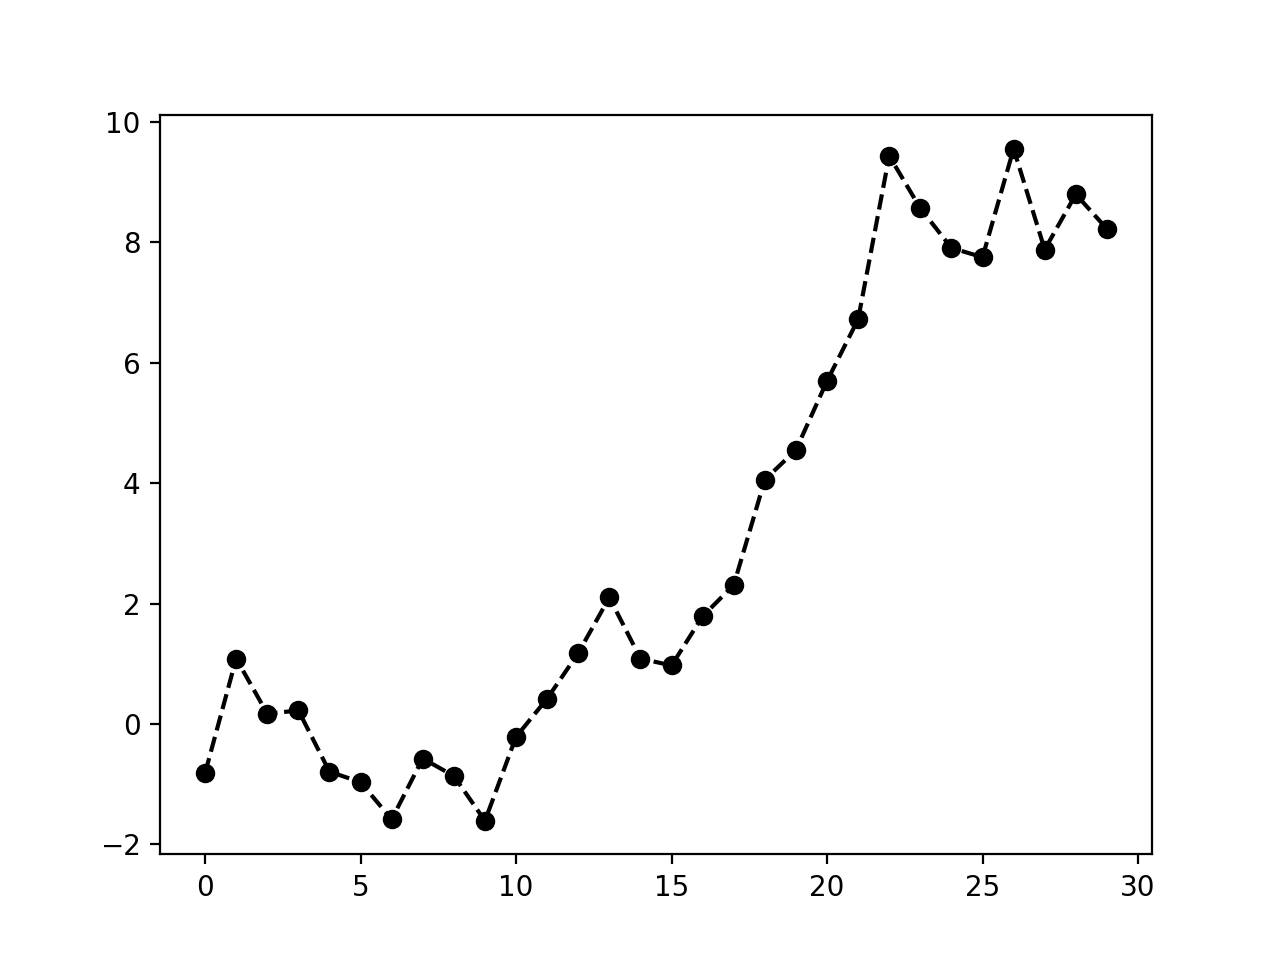

In [12]:
from numpy.random import randn
fig2, ax2 = plt.subplots()
ax2.plot(randn(30).cumsum(), 'ko--')
# OR long: ax2.plot(randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

<IPython.core.display.Javascript object>


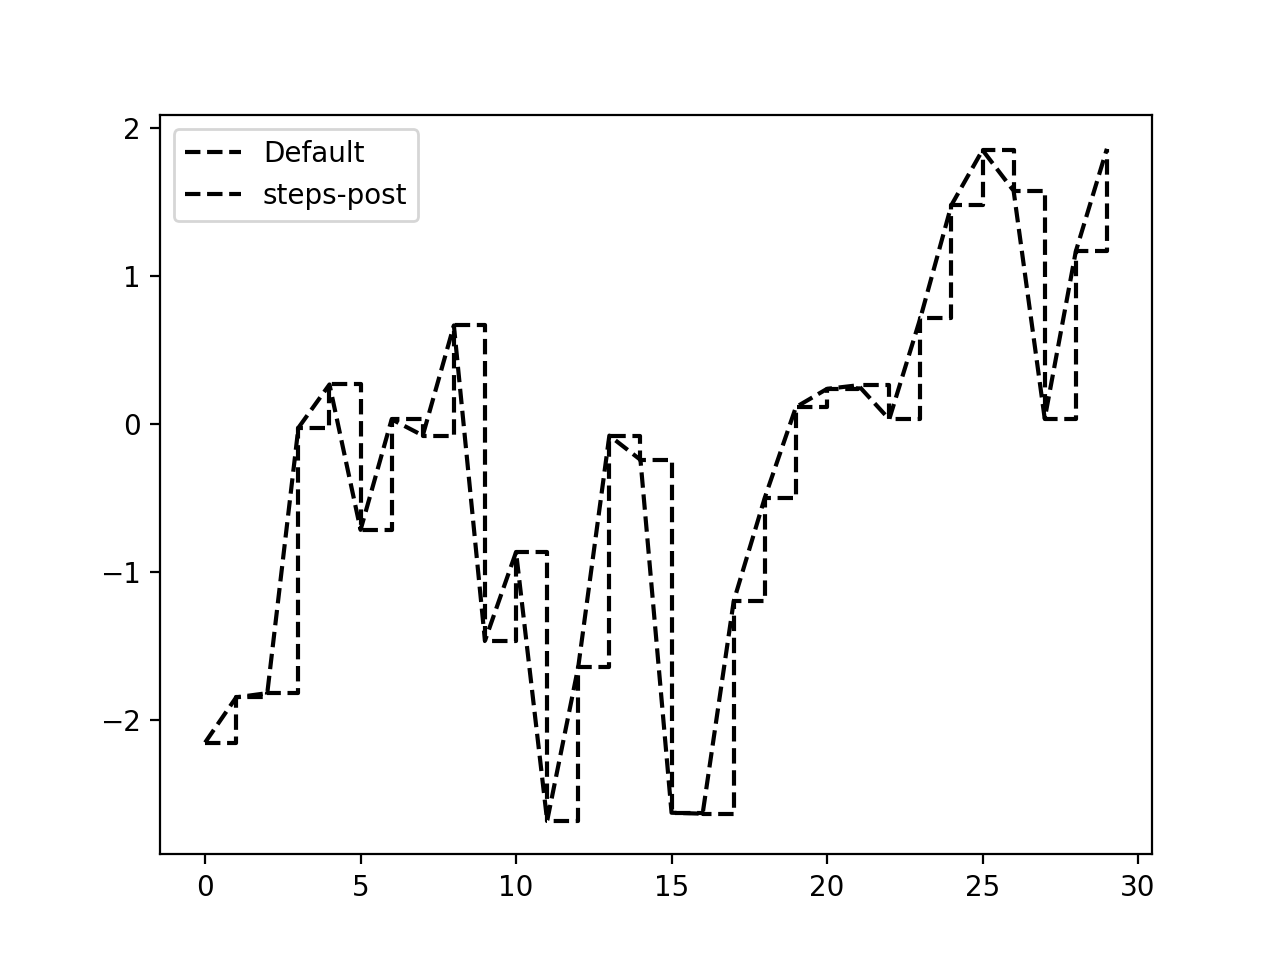

In [13]:
data = np.random.randn(30).cumsum()
fig3, ax3 = plt.subplots()
ax3.plot(data, 'k--', label='Default')
ax3.plot(data, 'k--', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


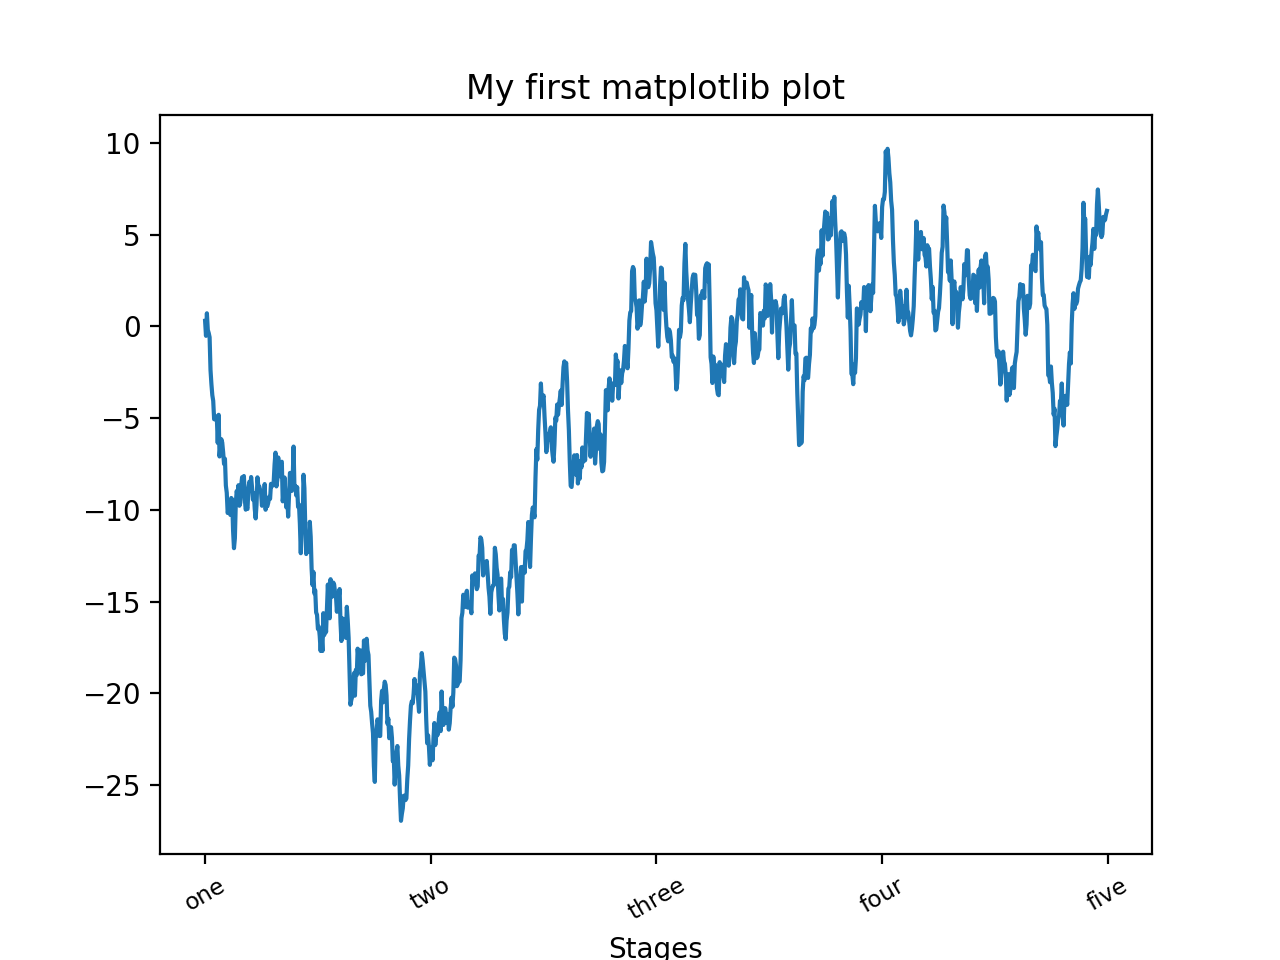

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [15]:
ticks = ax.set_xticks([0,250,500,750,1000])

In [16]:
labels = ax.set_xticklabels(['one', 'two','three','four','five'], rotation=30, fontsize='small')

In [17]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [18]:
ax.set_xlabel('Stages')

Text(0.5, 24.188360157402354, 'Stages')

#### Adding legends

<IPython.core.display.Javascript object>


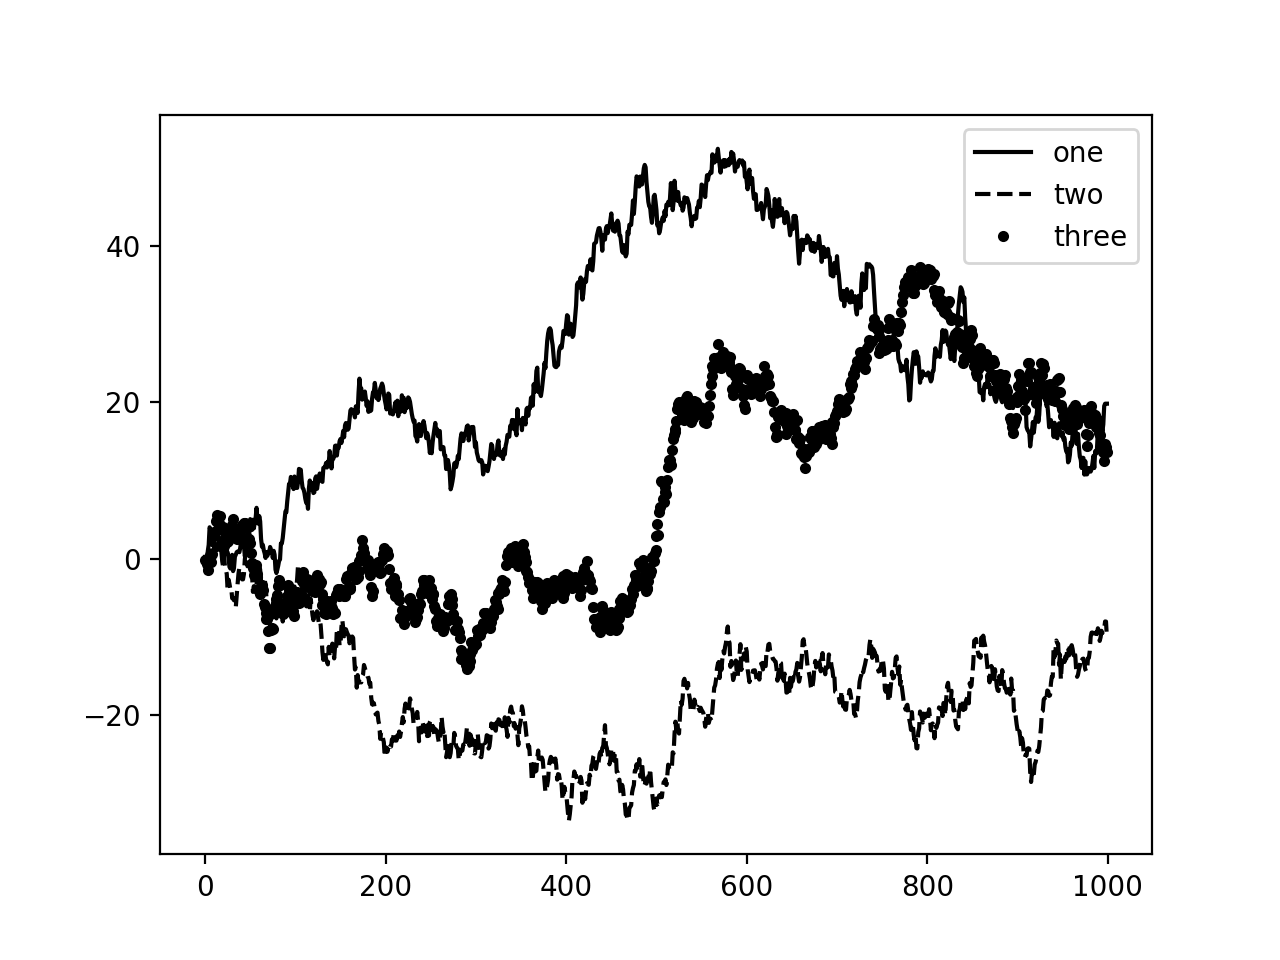

In [19]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best') # loc tells matplotlib where to place the legend plot

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations and text using the text, arrow, and annotate functions. text draws text at given coordniates (x,y) on the plot with optional custom styling.
Annotations can draw both text and arrows arranged appropriately. 

<IPython.core.display.Javascript object>


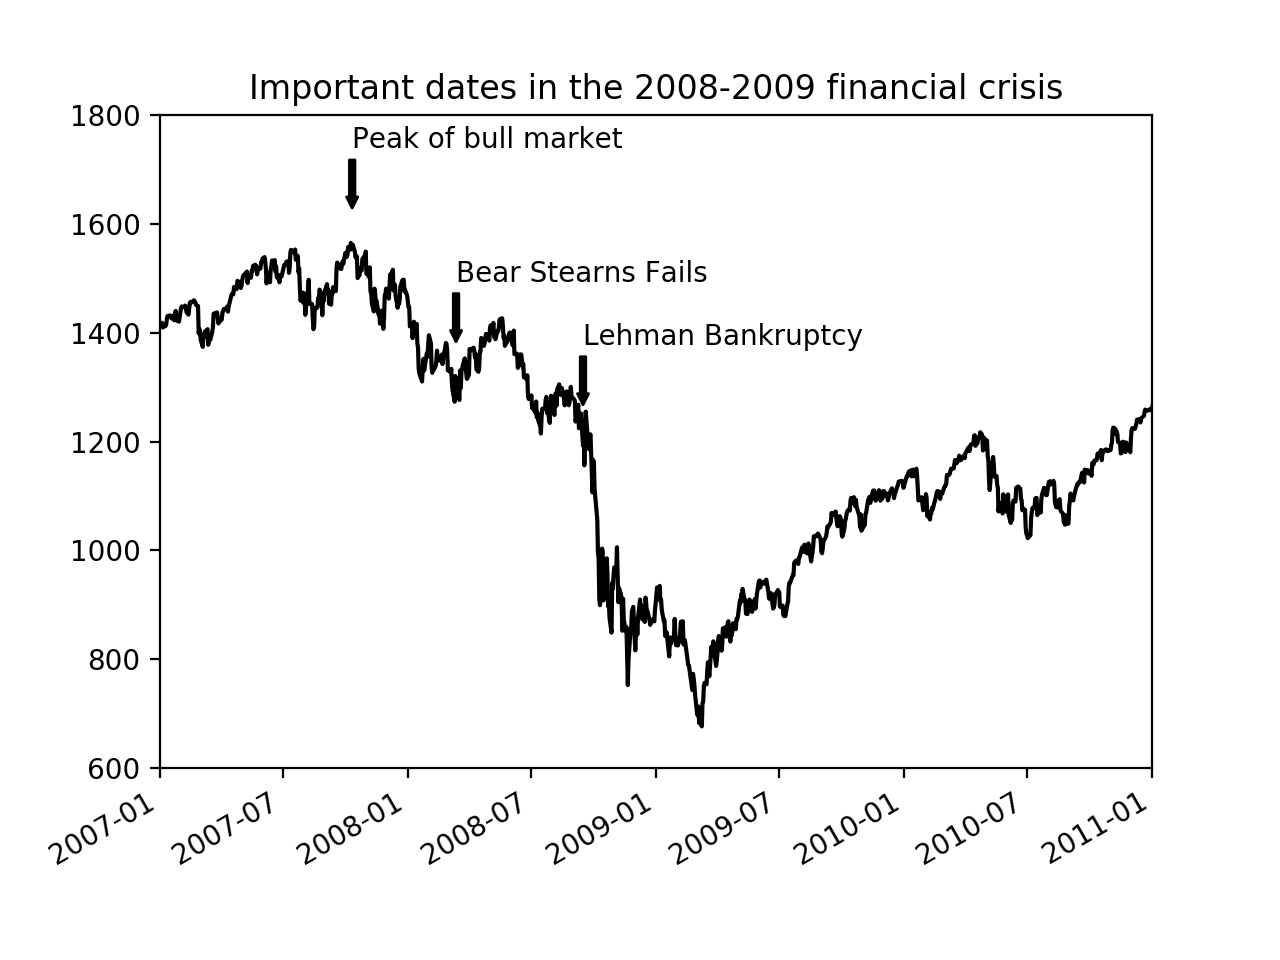

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [20]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('../examples/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax=ax, style = 'k-')

crisis_data = [
    (datetime(2007,10,11), 'Peak of bull market'),
    (datetime(2008,3,12), 'Bear Stearns Fails'),
    (datetime(2008,9,15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date,spx.asof(date) + 75),
               xytext=(date,spx.asof(date) + 225),
               arrowprops = dict(facecolor='black', headwidth=4, width = 2,
                                headlength=4),
               horizontalalignment = 'left', verticalalignment = 'top')

# Zoom in on 2007-2010

ax.set_xlim('1/1/2007', '1/1/2011')
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as _patches_. Some of these, like Rectangle and Circle, are found in the matplotlib.pyplot, but the full set is located in matplotlib.patches.
To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ax.add_patch(shp):

<IPython.core.display.Javascript object>


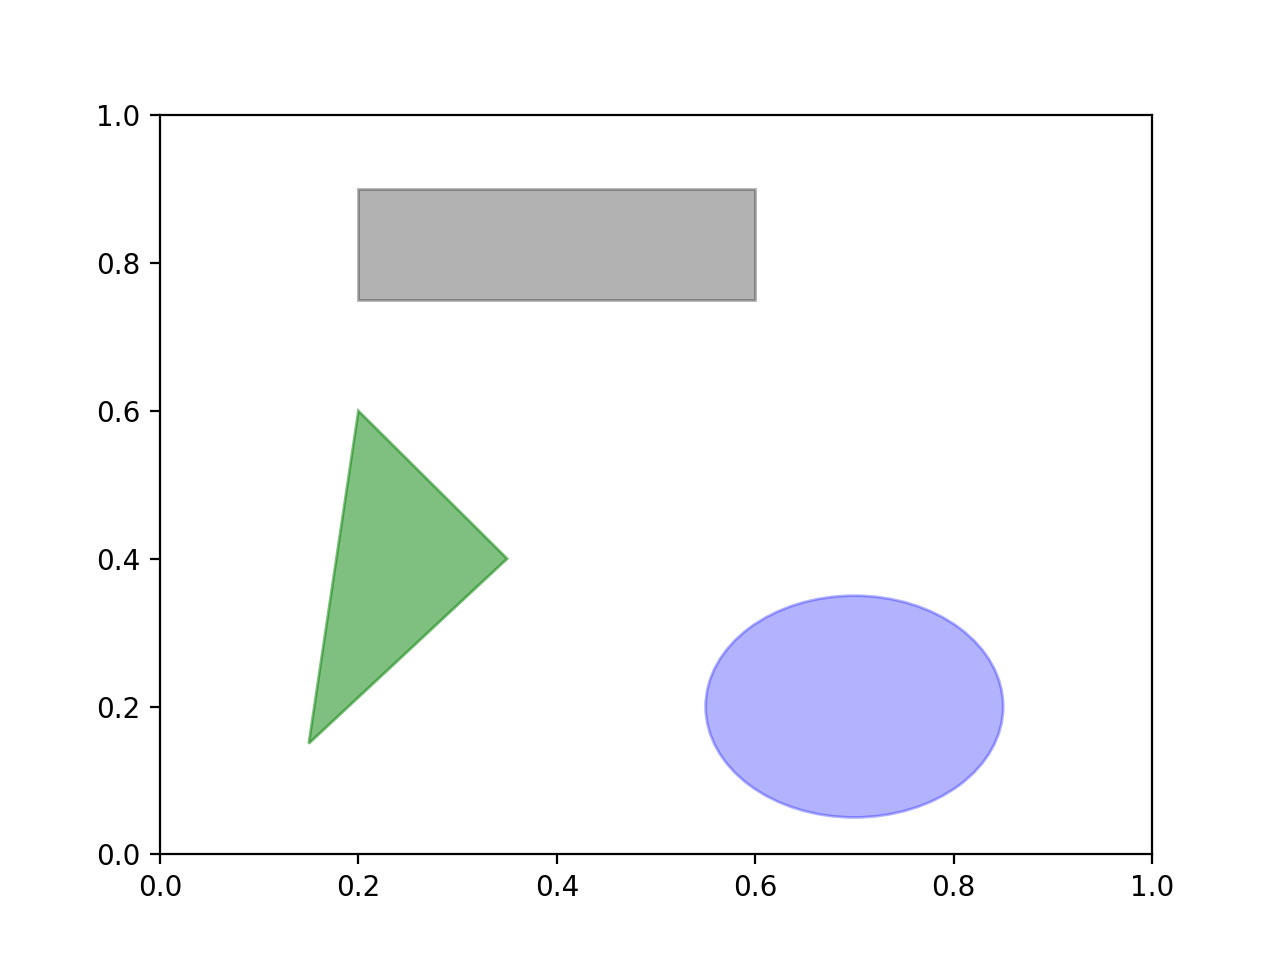

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to Files

You can save the active figure to file using plt.savefig. This method is equivalent to the figure object's savefig instance method. 
To get a plot as PNG with minimal whitespace around the plot and at 400 DPI (dots-per-inch), you would do:

In [22]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primaryly toward preparing figures for publication. One way to modify the configuration programmatically from Python is to use the rc method; for example, to set the global default figure size to be 10x10, you could enter:

In [23]:
# plt.rc('figure', figsize=(10,10))

As we will see in the next section, the seaborn package has several built-in plot themes or styles that use matplotlib's configuration system internally.

## Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title. ticks, tick labels, and other annotations.
In __pandas__ we may have multiple columns of data, along with row and column labels, pandas itself has built-in methods that simplify creating visualizations from __DataFrame__ and __Series__ objects. Another library is __seaborn__, a statistical graphics library created by Michael Waskorn. Seaborn simplifies creating many common visualization types.

Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aestatics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple eay to improve the visual aestatics of general matplotlib plots.

### Line Plots

<IPython.core.display.Javascript object>


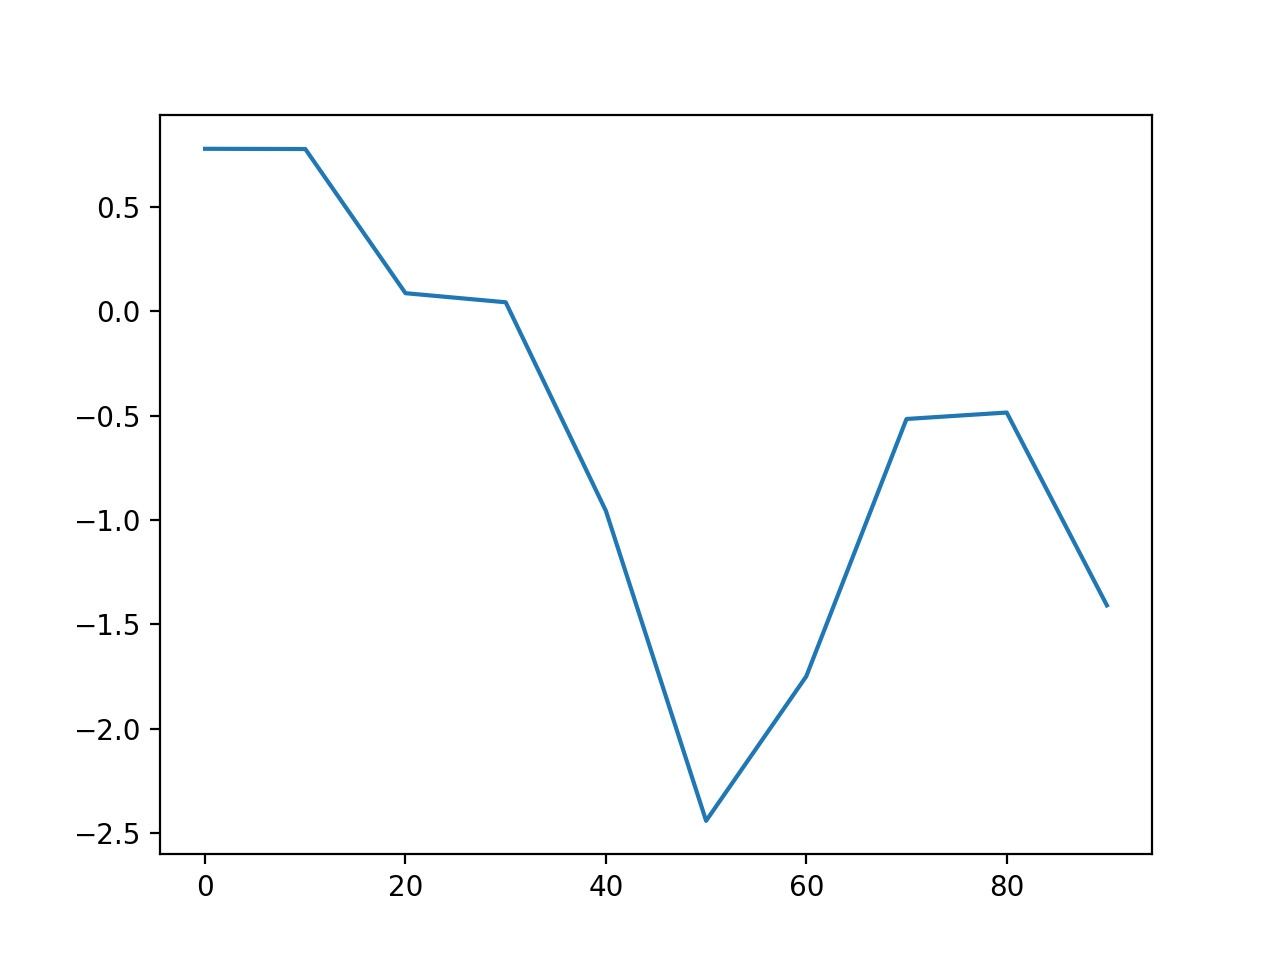

In [24]:
import numpy as np
import pandas as pd
fig, axes = plt.subplots(1,1) # this line is not indicate in the book, but seems to be necessary 
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

DataFrame's plot method plots each of its columns as a different line on the same subplot, creating a legend automatically:

<IPython.core.display.Javascript object>


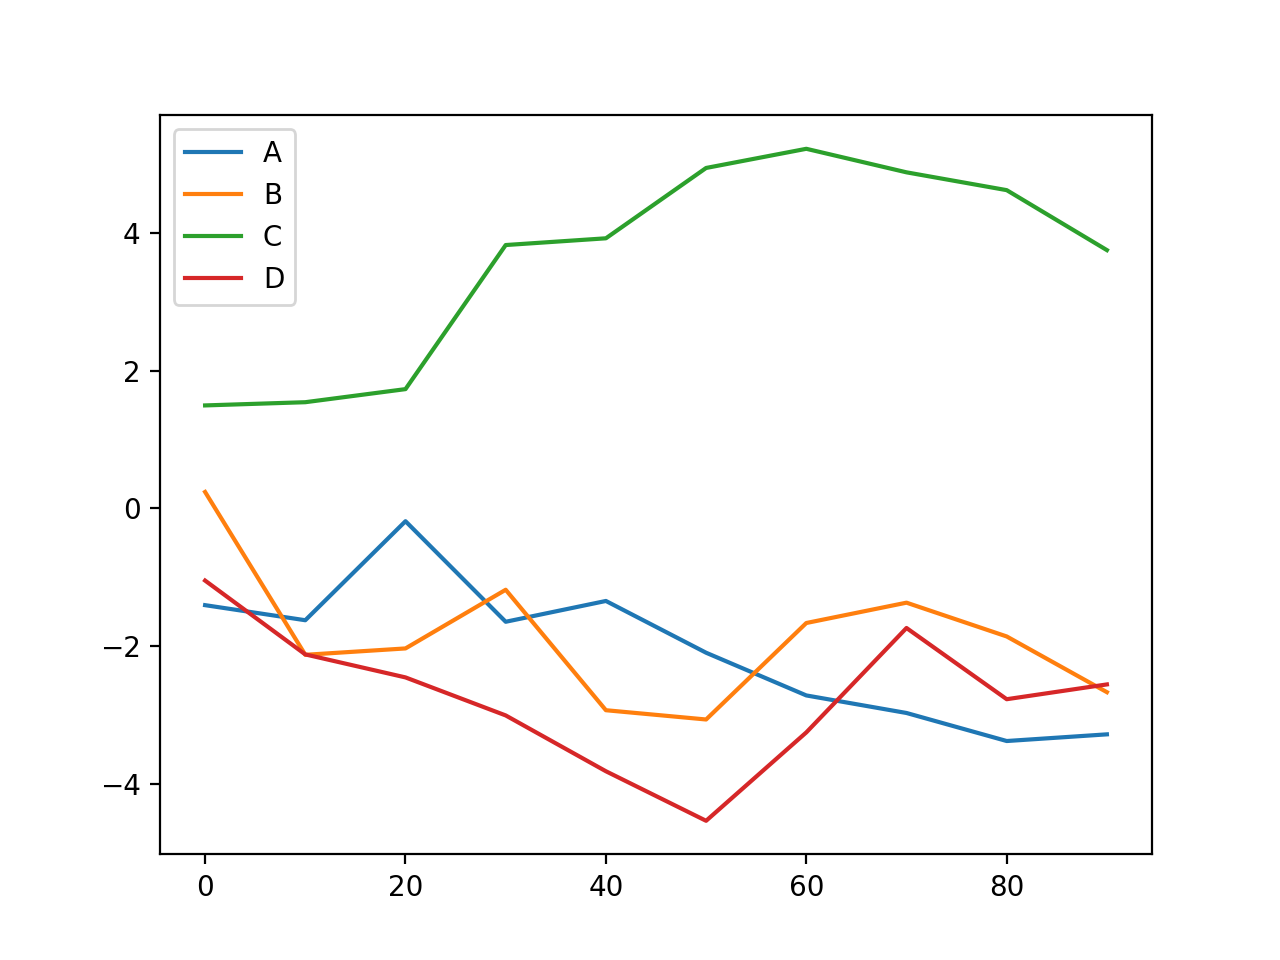

In [25]:
import numpy as np
import pandas as pd
# fig, axes = plt.subplots(1,1)
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
               columns=['A','B','C','D'],
               index = np.arange(0,100,10))
df.plot()

### Bar Plots

<IPython.core.display.Javascript object>


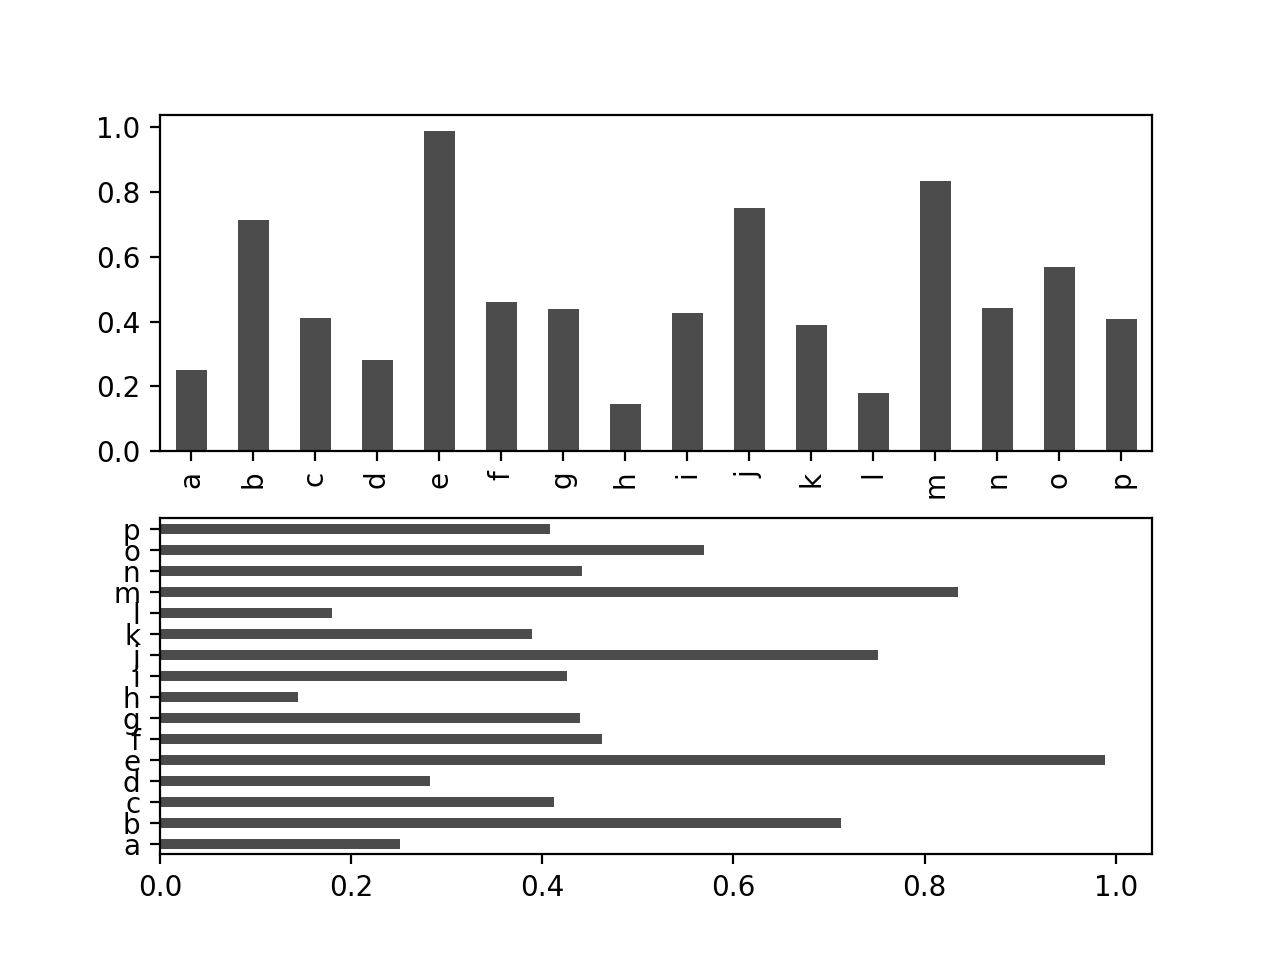

In [26]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1) 

data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [27]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(6,4),
                  index=['one','two','three','four','five','six'],
                  columns=pd.Index(['A','B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.216147,0.774188,0.930202,0.587052
two,0.330388,0.383606,0.248963,0.720719
three,0.754549,0.651181,0.737873,0.055559
four,0.110625,0.274560,0.419157,0.144807
five,0.849738,0.225328,0.821287,0.992677
six,0.025929,0.338295,0.913702,0.688932


<IPython.core.display.Javascript object>


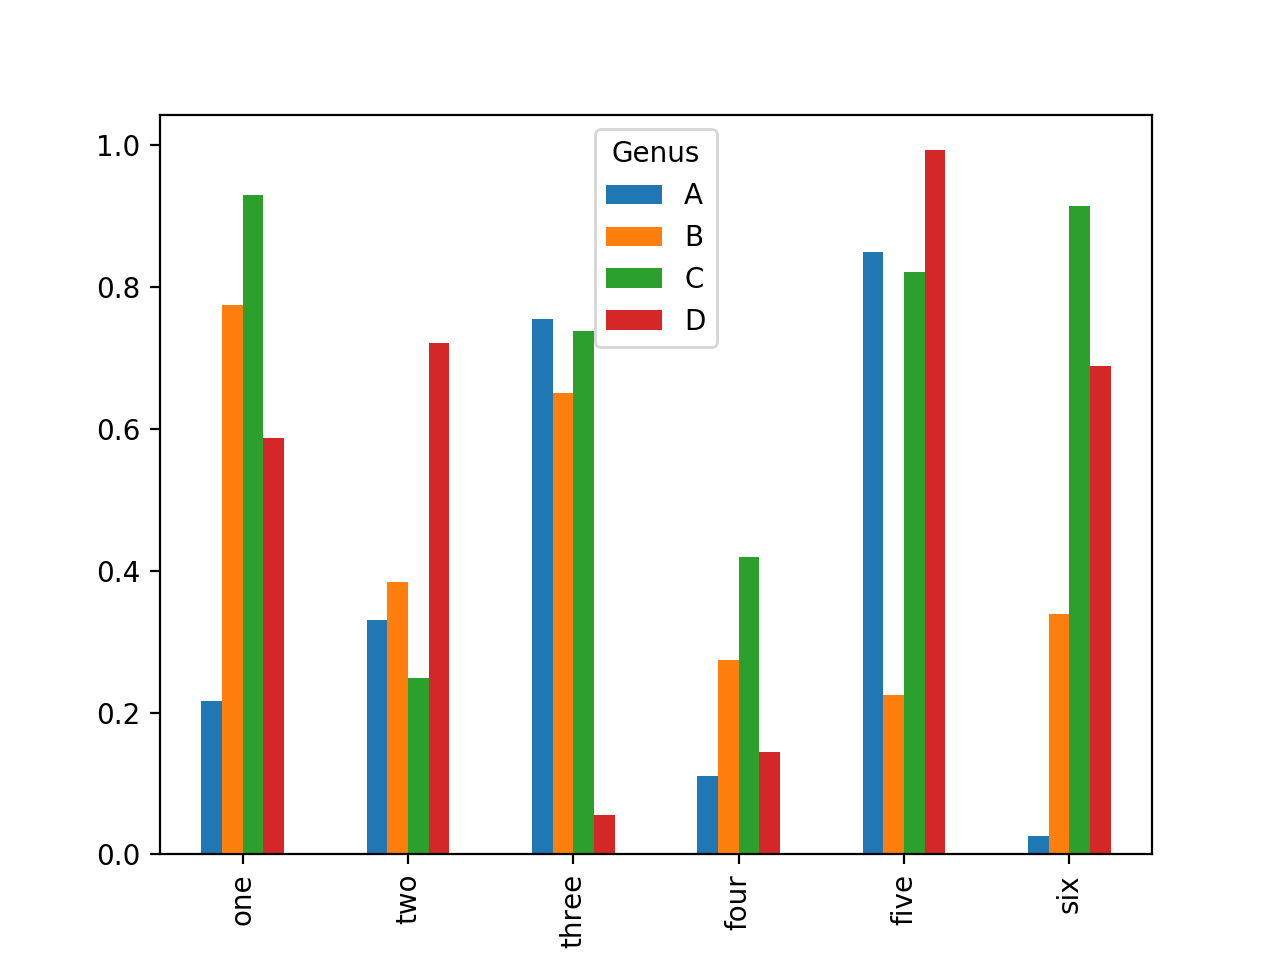

In [28]:
df.plot.bar()

<IPython.core.display.Javascript object>


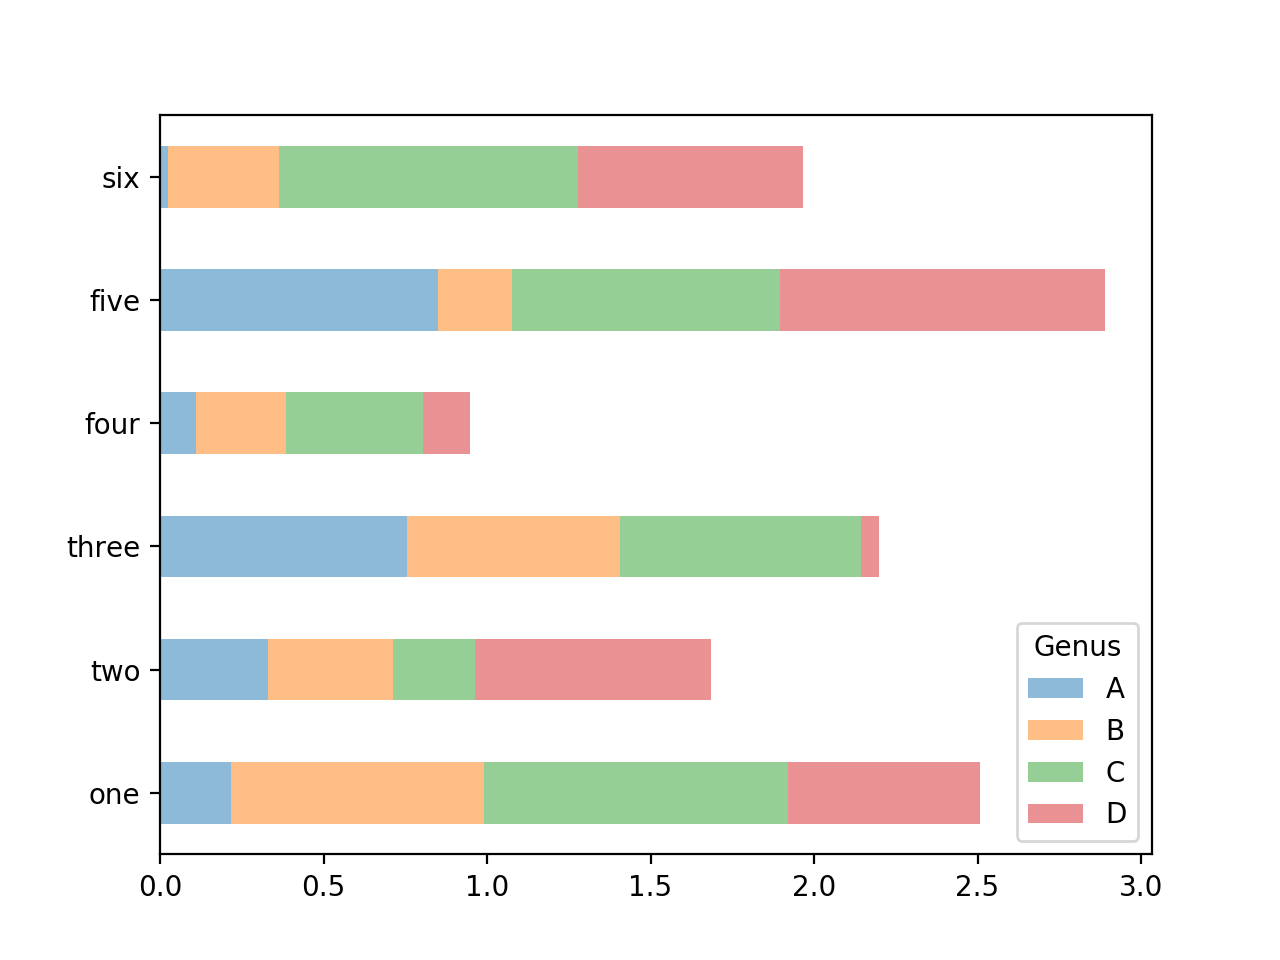

In [29]:
df.plot.barh(stacked=True, alpha=0.5)

New example: Tipping dataset - we want to make a stacked bar plot showing the percentage of data points for each party size on each day:

In [30]:
tips = pd.read_csv('../examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [31]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:,2:5]

In [32]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


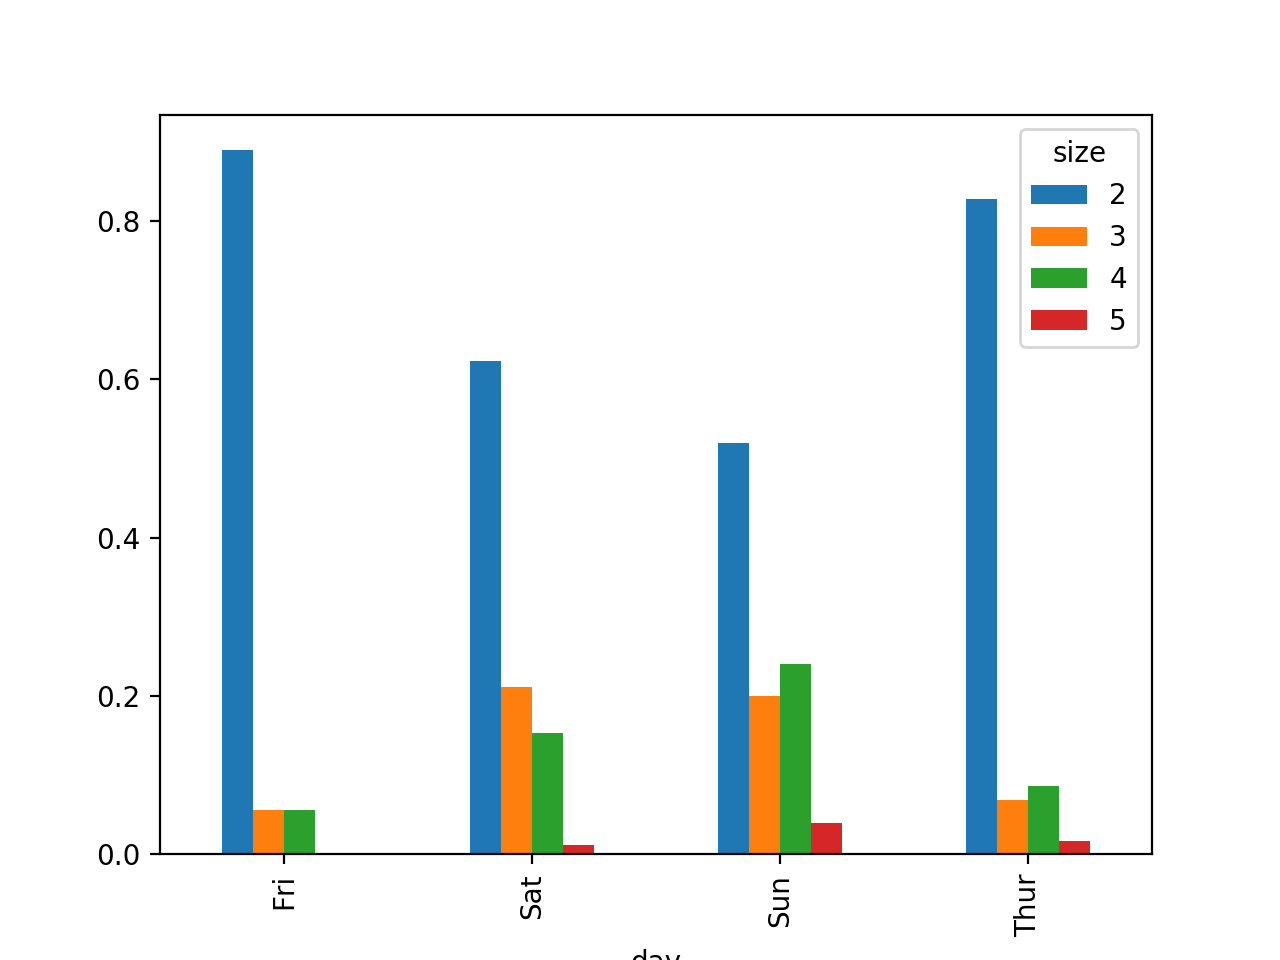

In [33]:
party_pcts.plot.bar()

In [34]:
plt.close('all')

With data that requires aggregation and summarization before making a plot, using the __seaborn__ package can make things much simpler. Let's look now at the tipping percentage by day with seaborn:

In [35]:
import seaborn as sns
tips['tip_pct']=tips['tip']/(tips['total_bill']- tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


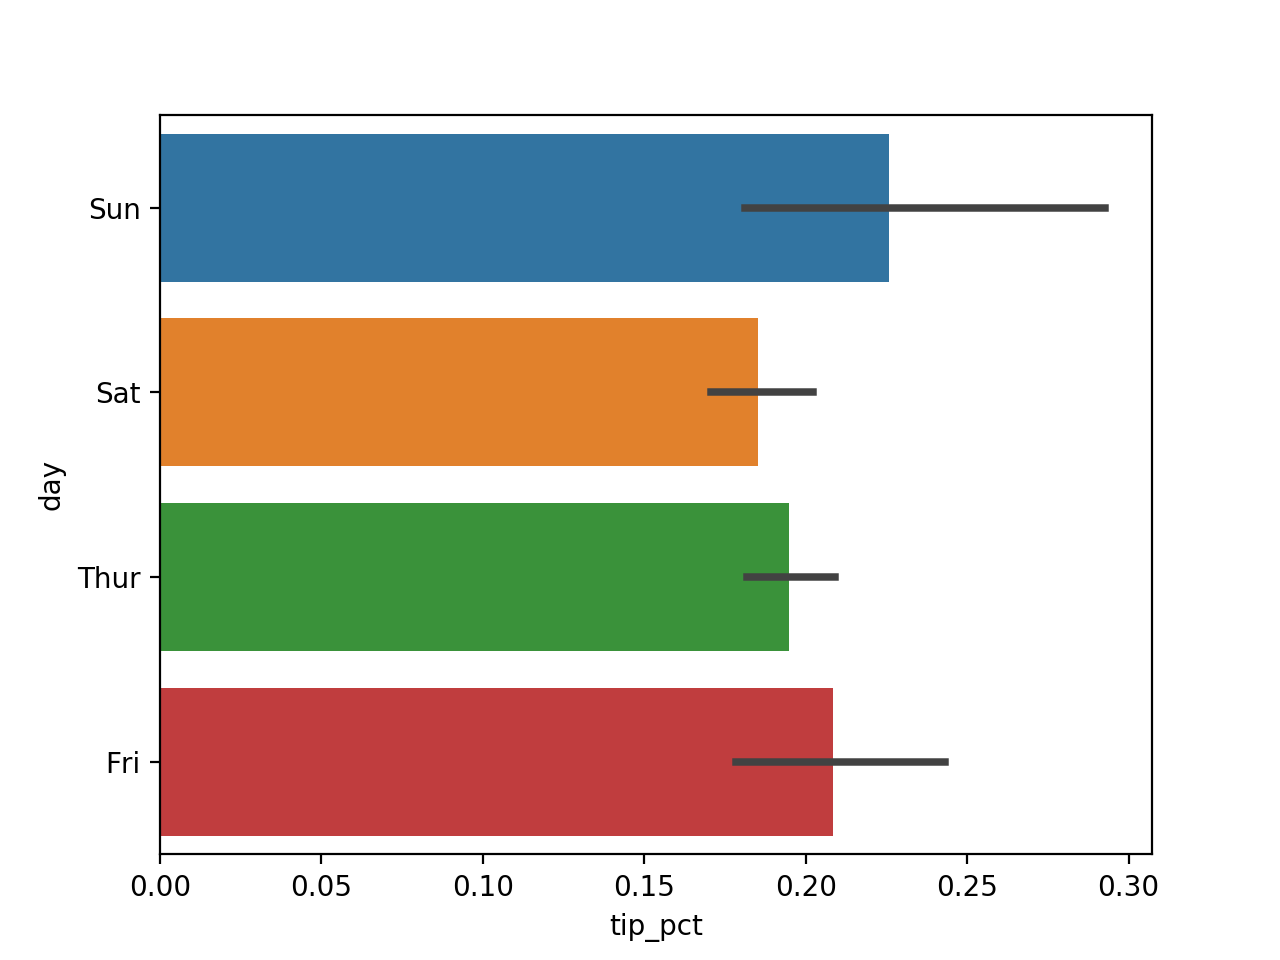

In [36]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [37]:
plt.close('all')

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


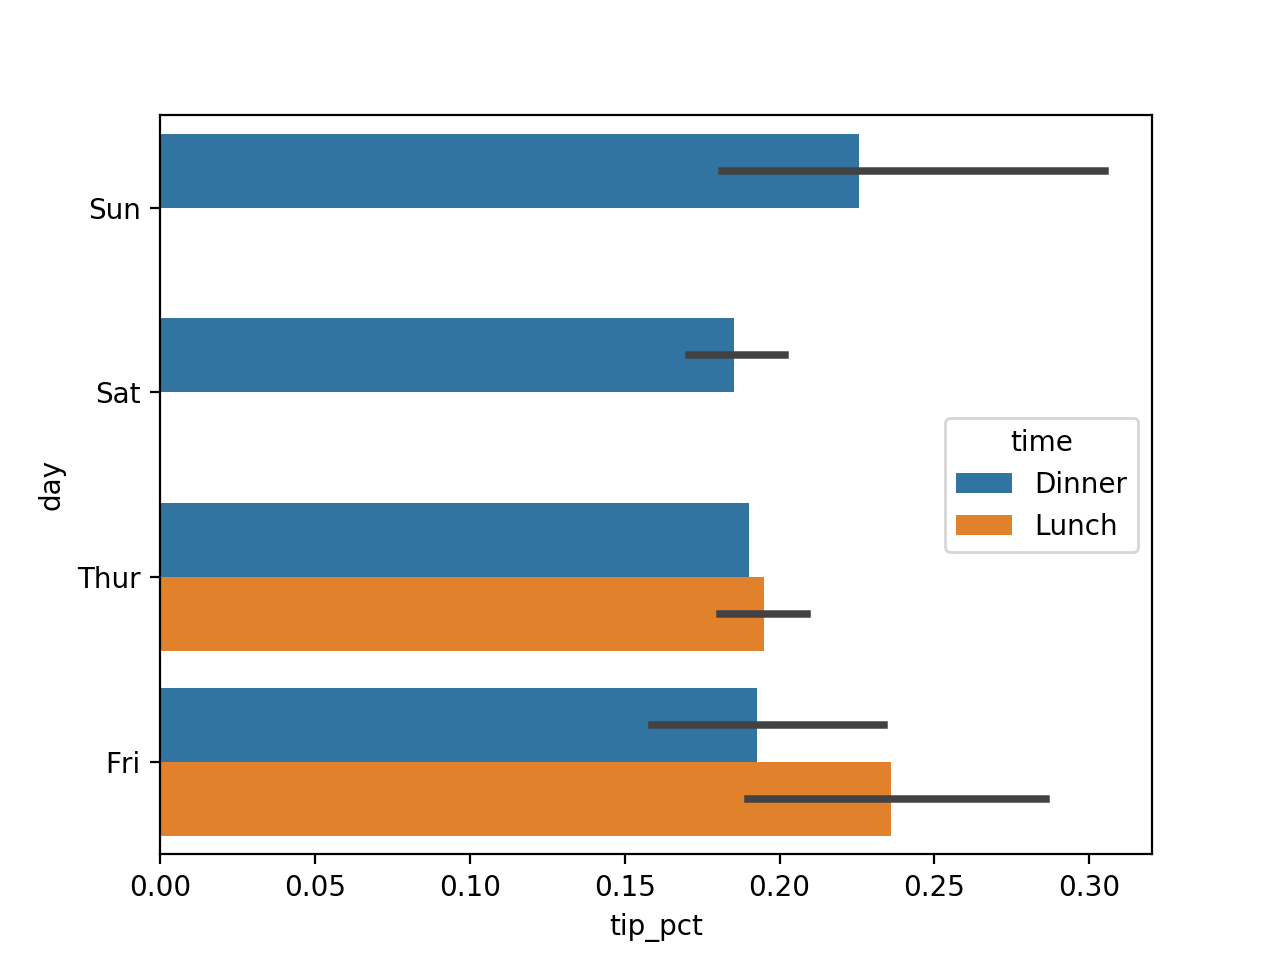

In [38]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [39]:
plt.close('all') # Always close the plot - Otherwise the new plot will be plotted in the old figure

You can switch between different plot appearances using __seaborn.set__

In [40]:
sns.set(style="whitegrid")

### Histograms and Density Plots

<IPython.core.display.Javascript object>


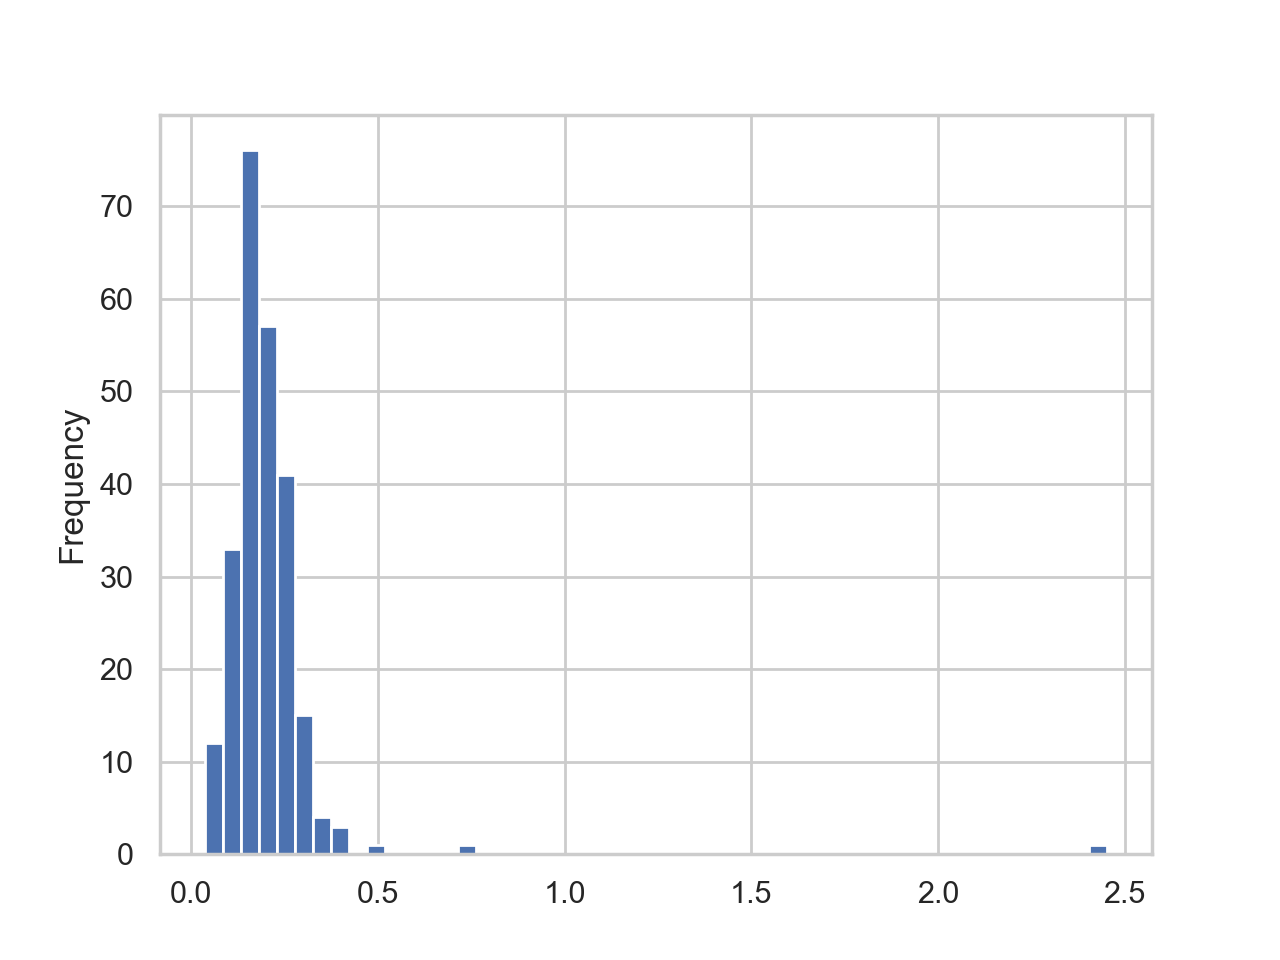

In [41]:
tips['tip_pct'].plot.hist(bins=50)

In [42]:
plt.close('all') 

A related plot type is a _density plot_, which is formed by computing an estimate of a continuous probability distribution that might have generated the obversed data. The usual procedure is to approximate this distribution as a mixture of "kernels" - that is, simpler distributions like normal distributions. Thus, density plots are also known as kernel density estimate (KDE) plots:

<IPython.core.display.Javascript object>


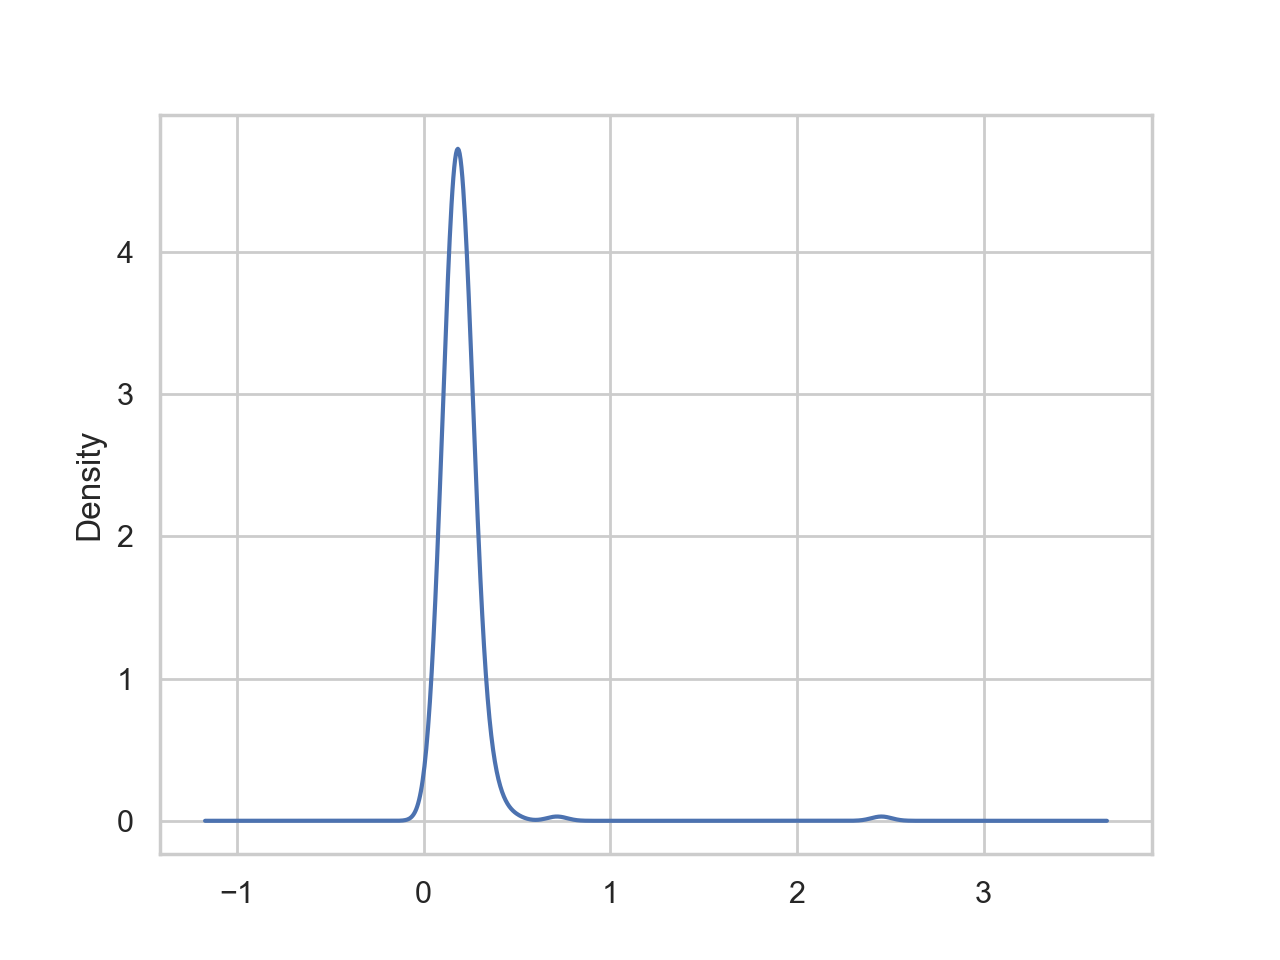

In [43]:
tips['tip_pct'].plot.density()

In [44]:
plt.close('all') 

Seaborn makes histograms and density plots even easier through its __displot__ method, which can plot both a histogram and a continuous density estimate simulationeously. As an example, consider a binominal distribution consisting of draws from two different standard normal distributions:

In [45]:
comp1 = np.random.normal(0,1,size=200) # (center, variance, #numbers)

In [46]:
comp2 = np.random.normal(10,2,size=200)

In [47]:
values =  pd.Series(np.concatenate([comp1,comp2]))

<IPython.core.display.Javascript object>


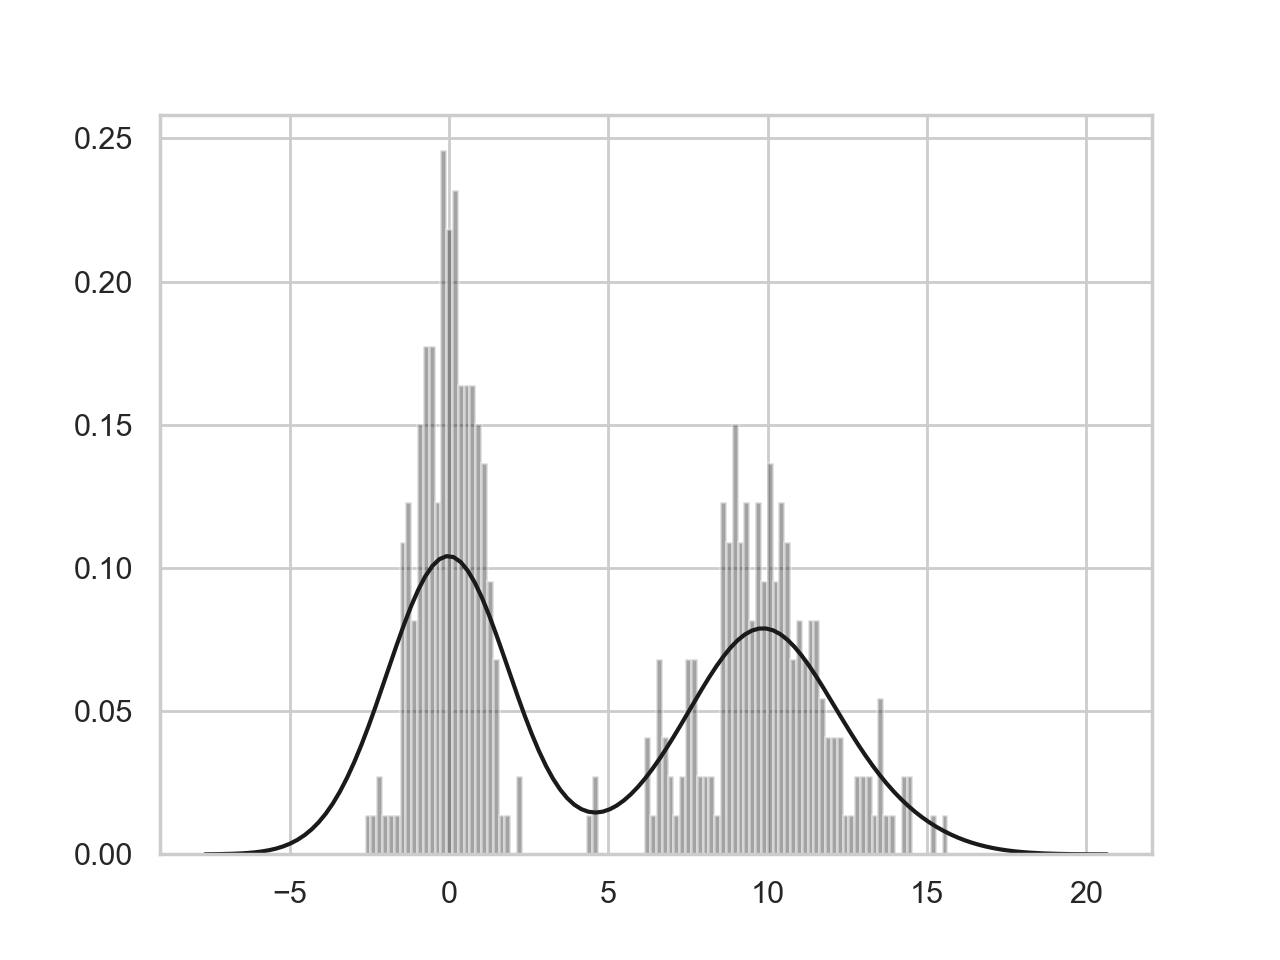

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [48]:
sns.distplot(values,bins=100,color='k')

In [49]:
plt.close('all') 

### Scatter or Point Plots 

Point plots or scatter plots can be a useful way of estimating the realtionship between two one-dimensional data series.

In [50]:
macro = pd.read_csv('../examples/macrodata.csv')

In [51]:
data = macro[['cpi','m1','tbilrate','unemp']]

In [52]:
trans_data = np.log(data).diff().dropna()

In [53]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


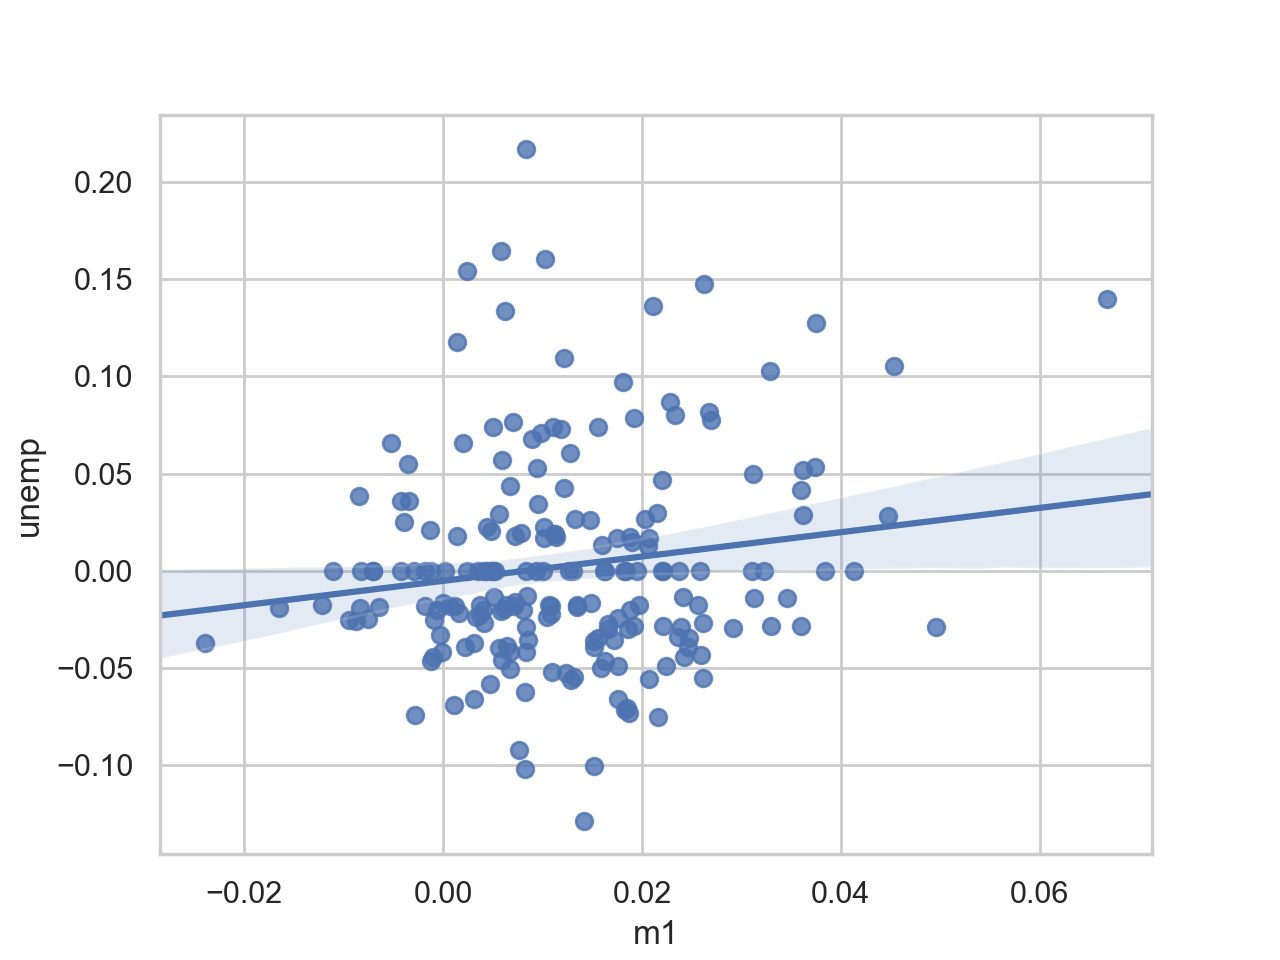

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [54]:
sns.regplot('m1','unemp',data=trans_data)

In [55]:
plt.close('all') 

In exploratory data analysis it's helpful to be able to look at all the scatter plots among a group of variables; this is known as a _pairs_ plot or _scatter_ plot _matrix_. Making such a plot from scratch is a bit of work, so seaborn has a convenient __pairplot__ function, which supports placing histograms or density estimates of each variable along the diagronal:

<IPython.core.display.Javascript object>


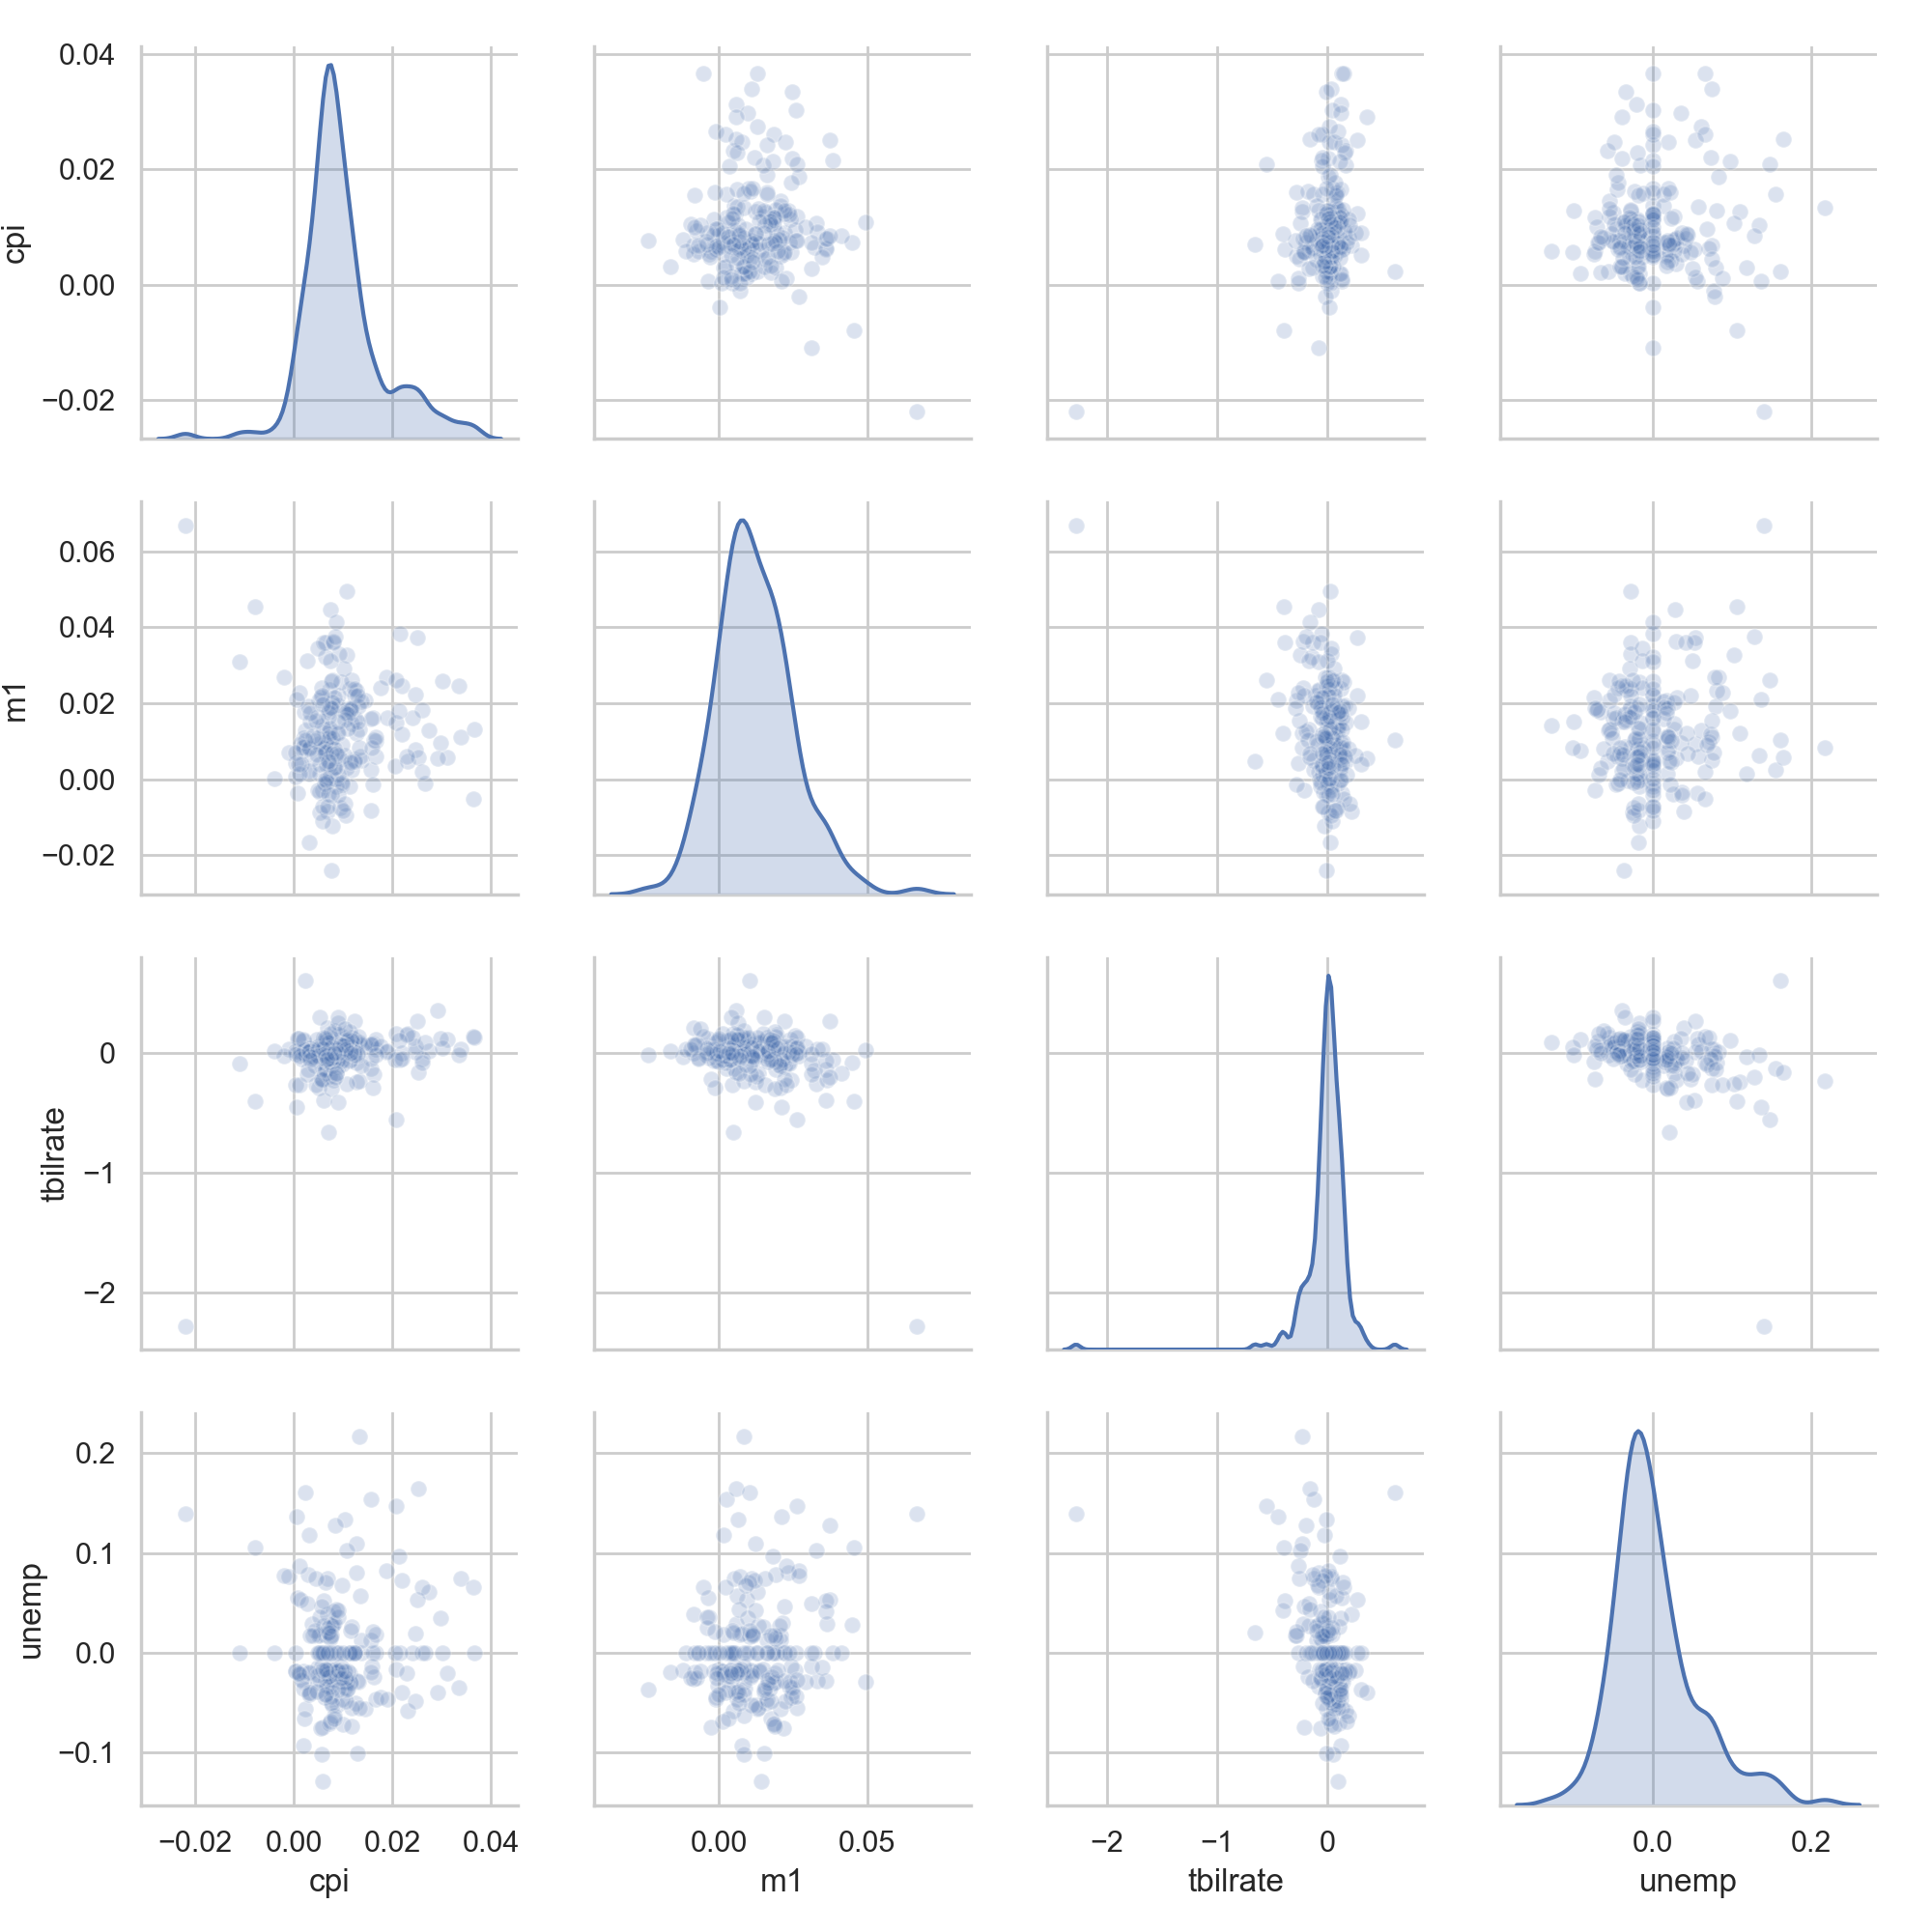

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [56]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

In [57]:
plt.close('all') 

### Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a _facet grid_. Seaborn has a useful built-in function __factorplot__ that simplifies making many kinds of faceted plots:

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


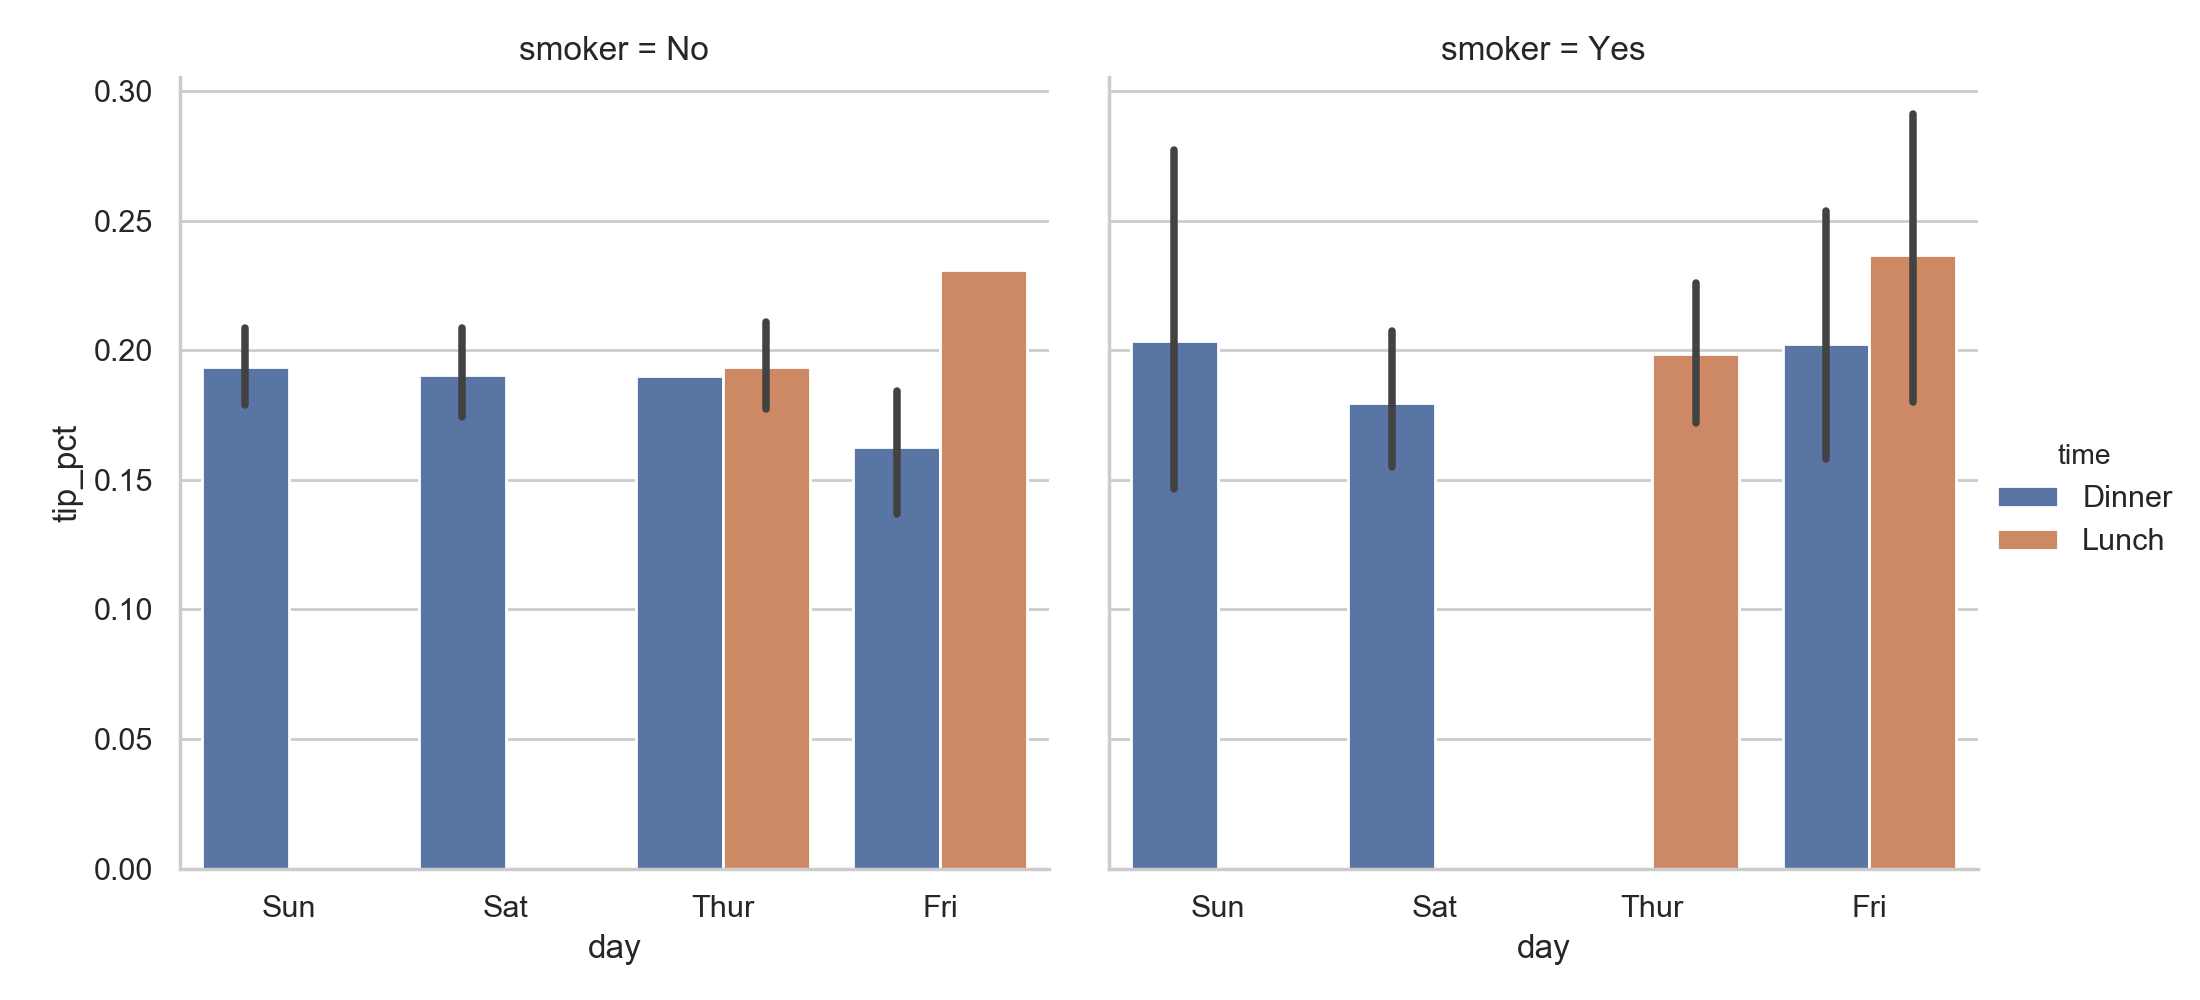

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [61]:
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',
              kind='bar', data = tips[tips.tip_pct < 1])

In [62]:
plt.close('all') 

Instead of grouping by 'time' by different bar colors within facet, we can also expand the facet grid by adding one row per time value:

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


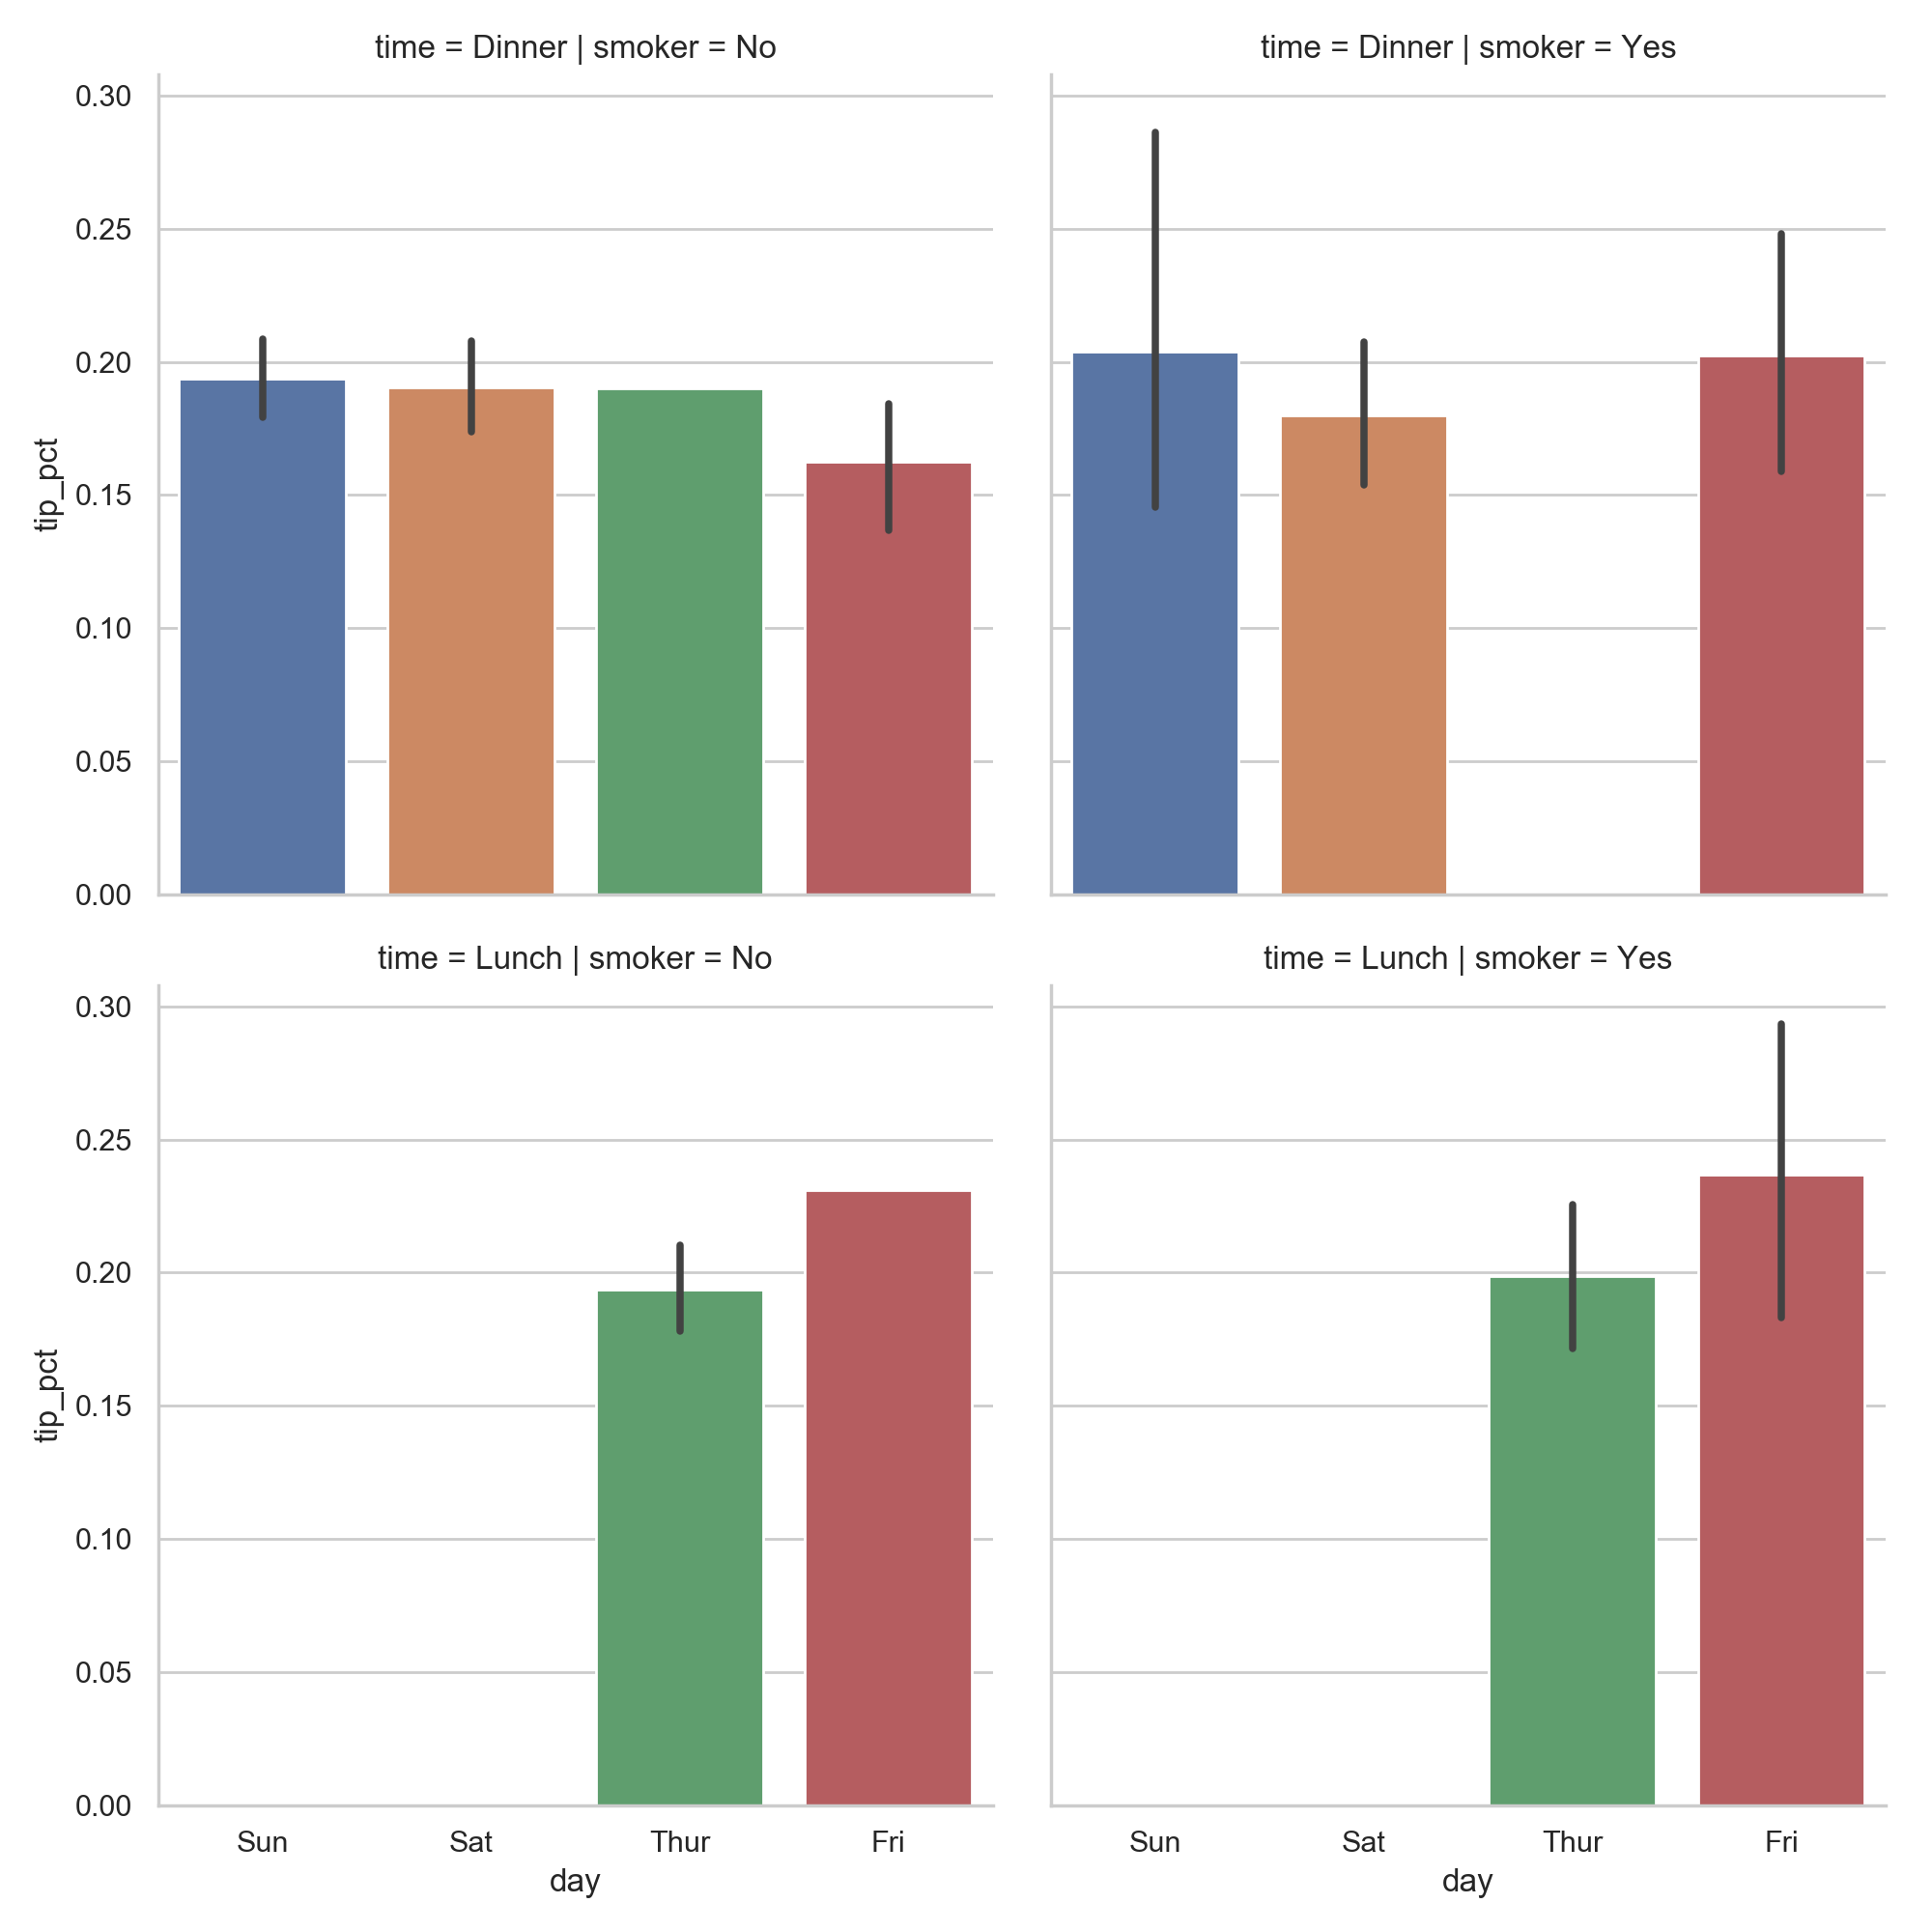

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [63]:
sns.factorplot(x='day',y='tip_pct', row='time',
              col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

In [64]:
plt.close('all') 

__factorplot__ supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which shows the median, quartile, and outliers) can be an effective visualization type:

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


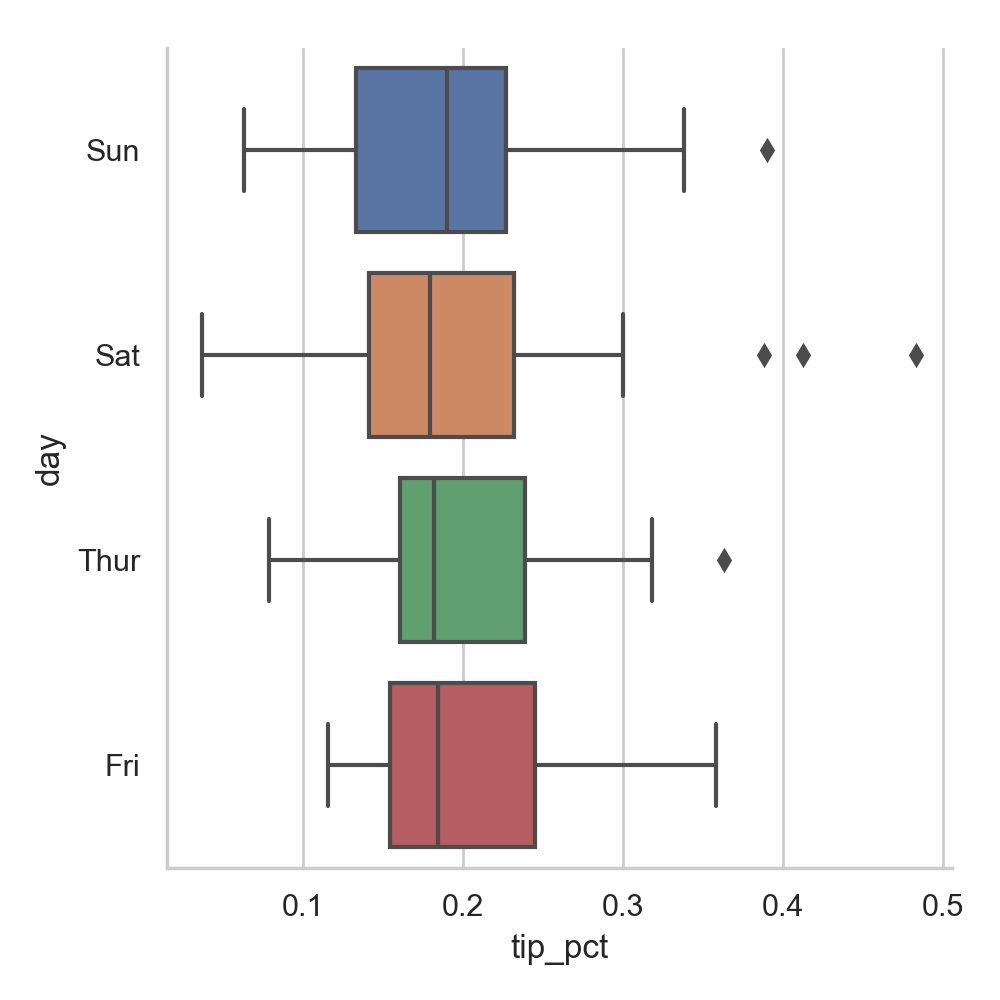

In [65]:
sns.factorplot(x='tip_pct', y='day', kind='box',
              data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

Since 2010, much development effort has been focussed on creating interactive graphics for publication on the web. With tools like Bokeh (http://bokeh.pydata.org/) and Plotly (http://github.com/plotly/plotly.py) it's now possible to specify dynamic, interactive graphics in Python that are destined for a web browser.

For creating static graphics for print or web, I recommend defaulting to matplotlib and add-on libraries like pandas and seaborn for your need. For other data visualization requirements, it may be useful to learn one of the other available tools out there. 